In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Useful function to reduce large datasets
# Refer :- https://www.kaggle.com/rinnqd/reduce-memory-usage

def reduce_memory_usage(df):
  
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [8]:
# Load data
pos_cash = reduce_memory_usage(pd.read_csv("./FINAL[.csv]/FINAL_pos_cash_balance.csv"))
app_train = reduce_memory_usage(pd.read_csv("./RAW_APPLICATION_DATA/application_train.csv"))
app_test = reduce_memory_usage(pd.read_csv("./RAW_APPLICATION_DATA/application_test.csv"))
bureau = reduce_memory_usage(pd.read_csv("./FINAL[.csv]/FINAL_BUREAU.csv"))
credit_card_balance = reduce_memory_usage(pd.read_csv("./FINAL[.csv]/FINAL_Credit_Card.csv"))
installments_payments = reduce_memory_usage(pd.read_csv("./FINAL[.csv]/FINAL_Installments_Payments.csv"))
previous_application = reduce_memory_usage(pd.read_csv("./FINAL[.csv]/FINAL_previous_app.csv"))

Memory usage of dataframe is 51.46 MB
Memory usage after optimization is: 12.22 MB
Decreased by 76.2%
Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%
Memory usage of dataframe is 37.54 MB
Memory usage after optimization is: 15.25 MB
Decreased by 59.4%
Memory usage of dataframe is 58.65 MB
Memory usage after optimization is: 24.05 MB
Decreased by 59.0%
Memory usage of dataframe is 23.32 MB
Memory usage after optimization is: 10.36 MB
Decreased by 55.6%
Memory usage of dataframe is 72.39 MB
Memory usage after optimization is: 19.71 MB
Decreased by 72.8%


Drop in app_train

In [9]:
# Columns in app_train are chosen to be dropped through EDA
cols_to_drop = ['FLAG_EMP_PHONE',
 'YEARS_BUILD_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLOORSMIN_MEDI',
 'FLOORSMAX_MEDI',
 'ENTRANCES_MEDI',
 'ELEVATORS_MEDI',
 'COMMONAREA_MEDI',
 'LIVINGAREA_MEDI',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LANDAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMAX_MEDI',
 'AMT_GOODS_PRICE',
 'FLOORSMIN_MODE',
 'FLOORSMAX_MODE',
 'ELEVATORS_MEDI',
 'LANDAREA_MEDI',
 'ENTRANCES_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'ENTRANCES_MODE',
 'APARTMENTS_MEDI',
 'COMMONAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'LANDAREA_MODE',
 'BASEMENTAREA_MODE',
 'APARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'TOTALAREA_MODE',
 'TOTALAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_AVG',
 'APARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'APARTMENTS_MODE',
 'TOTALAREA_MODE',
 'APARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'TOTALAREA_MODE',
 'APARTMENTS_MODE',
 'TOTALAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_AVG',
 'CNT_FAM_MEMBERS',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'ELEVATORS_MEDI',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'LIVE_REGION_NOT_WORK_REGION',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'ELEVATORS_MODE',
 'LIVINGAREA_MODE',
 'TOTALAREA_MODE',
 'TOTALAREA_MODE',
 'TOTALAREA_MODE',
 'ELEVATORS_MEDI',
 'LIVINGAREA_MODE',
 'TOTALAREA_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'APARTMENTS_MEDI',
 'TOTALAREA_MODE',
 'ELEVATORS_MODE',
 'APARTMENTS_MEDI',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_MODE',
 'TOTALAREA_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'APARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'ELEVATORS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'ELEVATORS_MODE',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY', 
 'COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'FLAG_OWN_REALTY',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'NONLIVINGAREA_AVG',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'APARTMENTS_AVG', 
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG']
                

Drop in app_train

In [10]:
app_train.drop(cols_to_drop, axis= 1, inplace= True)

In [11]:
app_train.shape

(307511, 37)

Drop in app_test

In [12]:
app_test.drop(cols_to_drop, axis= 1, inplace= True)

In [13]:
app_test.shape

(48744, 36)

In [14]:
# Combine app_train with app_test -> data dataframe
# data will be our final table
data = app_train.append(app_test)
data.shape

C:\Users\ACER\AppData\Local\Temp\ipykernel_3836\1276552192.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = app_train.append(app_test)


(356255, 37)

In [15]:
# Check data dataframe
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1.0,Cash loans,M,N,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,Business Entity Type 3,0.083008,0.262939,0.139404,2.0,2.0,-1134.0
1,100003,0.0,Cash loans,F,N,270000.0,1293502.5,Family,State servant,Higher education,...,0,0,0,School,0.311279,0.622070,NaN,1.0,0.0,-828.0
2,100004,0.0,Revolving loans,M,Y,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,Government,NaN,0.556152,0.729492,0.0,0.0,-815.0
3,100006,0.0,Cash loans,F,N,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,Business Entity Type 3,NaN,0.650391,NaN,2.0,0.0,-617.0
4,100007,0.0,Cash loans,M,N,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,1,Religion,NaN,0.322754,NaN,0.0,0.0,-1106.0


In [16]:
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
48739,456221,NaN,Cash loans,F,N,121500.0,412560.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,Other,NaN,0.648438,0.643066,1.0,0.0,-684.0
48740,456222,NaN,Cash loans,F,N,157500.0,622413.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,0,0,1,Trade: type 7,NaN,0.684570,NaN,2.0,0.0,0.0
48741,456223,NaN,Cash loans,F,Y,202500.0,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,0,0,0,Business Entity Type 3,0.733398,0.632812,0.283691,0.0,0.0,-838.0
48742,456224,NaN,Cash loans,M,N,225000.0,450000.0,Family,Commercial associate,Higher education,...,1,0,1,Self-employed,0.373047,0.445801,0.595215,0.0,0.0,-2308.0
48743,456250,NaN,Cash loans,F,Y,135000.0,312768.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,Government,NaN,0.456543,0.272217,0.0,0.0,-327.0


#### **COMBINE: POS_CASH, INSTALLLMENTS_PAYMENTS, CREDIT_CARD_BALANCE, PREVIOUS_APPLICATION -> DATA**

In [17]:
# Overview of current posh_cash_balance
pos_cash.head()

,Unnamed: 0,SK_ID_CURR,POS_CAS_MONTHS_BALANCE_MIN,POS_CAS_MONTHS_BALANCE_MAX,POS_CAS_MONTHS_BALANCE_MEAN,POS_CAS_CNT_INSTALMENT_MIN,POS_CAS_CNT_INSTALMENT_MAX,POS_CAS_CNT_INSTALMENT_MEAN,POS_CAS_pos_cash_remaining_installments_MIN,POS_CAS_pos_cash_remaining_installments_MAX,POS_CAS_pos_cash_remaining_installments_MEAN,POS_CAS_pos_cash_completed_contracts_MIN,POS_CAS_pos_cash_completed_contracts_MAX,POS_CAS_pos_cash_completed_contracts_MEAN,POS_CAS_SK_DPD_MIN,POS_CAS_SK_DPD_MAX,POS_CAS_SK_DPD_MEAN,POS_CAS_SK_DPD_DEF_MIN,POS_CAS_SK_DPD_DEF_MAX,POS_CAS_SK_DPD_DEF_MEAN
0,0,100001,-56,-56,-56,4.0,4.0,4.0,3.0,3.0,3.0,2,2,2,0,0,0,0,0,0
1,1,100002,-15,-15,-15,24.0,24.0,24.0,20.0,20.0,20.0,0,0,0,0,0,0,0,0,0
2,2,100003,-28,-28,-28,6.0,6.0,6.0,6.0,6.0,6.0,2,2,2,0,0,0,0,0,0
3,3,100004,-26,-26,-26,4.0,4.0,4.0,3.0,3.0,3.0,1,1,1,0,0,0,0,0,0
4,4,100005,-15,-15,-15,9.0,9.0,9.0,0.0,0.0,0.0,1,1,1,0,0,0,0,0,0


In [18]:
data = data.merge(pos_cash, on= "SK_ID_CURR", how= "left")
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,POS_CAS_pos_cash_remaining_installments_MEAN,POS_CAS_pos_cash_completed_contracts_MIN,POS_CAS_pos_cash_completed_contracts_MAX,POS_CAS_pos_cash_completed_contracts_MEAN,POS_CAS_SK_DPD_MIN,POS_CAS_SK_DPD_MAX,POS_CAS_SK_DPD_MEAN,POS_CAS_SK_DPD_DEF_MIN,POS_CAS_SK_DPD_DEF_MAX,POS_CAS_SK_DPD_DEF_MEAN
0,100002,1.0,Cash loans,M,N,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,Cash loans,F,N,270000.0,1293502.5,Family,State servant,Higher education,...,6.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,...,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,...,8.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0.0,Cash loans,M,N,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,...,8.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Check the size of current data
data.shape

(356255, 56)

**Combine previous_application -> data**

In [20]:
# Overview of previous_application
previous_application.head()

,SK_ID_CURR,PREV_APPL_APPROVED_FLAG,PREV_APPL_REFUSED_FLAG,PREV_APPL_CONSUM_LOAN_FLAG,PREV_APPL_CASH_LOAN_FLAG,PREV_APPL_REVOL_LOAN_FLAG,PREV_APPL_POS_PORTFOLIO_FLAG_COUNT,PREV_APPL_CASH_PORTFOLIO_FLAG_COUNT,PREV_APPL_SK_ID_PREV,PREV_APPL_AMT_ANNUITY,...,PREV_APPL_DAYS_FIRST_DUE,PREV_APPL_DAYS_LAST_DUE,PREV_APPL_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_PREV_APPL_APPROVED_FLAG,PREV_APPL_PREV_APPL_REFUSED_FLAG,PREV_APPL_PREV_APPL_CONSUM_LOAN_FLAG,PREV_APPL_PREV_APPL_CASH_LOAN_FLAG,PREV_APPL_PREV_APPL_REVOL_LOAN_FLAG,PREV_APPL_PREV_APPL_POS_PORTFOLIO_FLAG_COUNT,PREV_APPL_PREV_APPL_CASH_PORTFOLIO_FLAG_COUNT
0,100001,1,1,1,1,1,1,1,1369693.00,3951.000000,...,-1709.0,-1619.0,0.000000,1.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000
1,100002,1,1,1,1,1,1,1,1038818.00,9251.775391,...,-565.0,-25.0,0.000000,1.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000
2,100003,3,3,3,3,3,3,3,2281150.25,56553.988281,...,-1274.0,-1054.0,0.666504,1.0,0.0,0.666504,0.333252,0.0,0.333252,0.666504
3,100004,1,1,1,1,1,1,1,1564014.00,5357.250000,...,-784.0,-724.0,0.000000,1.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000
4,100005,2,2,2,2,2,2,2,2176837.00,4813.200195,...,-706.0,-466.0,0.000000,0.5,0.0,0.500000,0.500000,0.0,0.000000,0.500000


In [21]:
# Combine
data = data.merge(previous_application, on = 'SK_ID_CURR', how = 'left')

In [22]:
# Check the size of current data
data.shape

(356255, 83)

**Combine instalments_payments -> data**

In [23]:
# Combine: instalments_payments -> previous_application
# Overview of instalments_payments
installments_payments.head()

,SK_ID_CURR,INS_PAY_DONE_PREV_CRE_SUM_FIRST,INS_PAY_INSTALLMENT_COUNT_FIRST,INS_PAY_INSTALL_SUM_FIRST,INS_PAY_PAYMENT_SUM_FIRST,INS_PAY_DAY_DIF_L_SUM,INS_PAY_DAY_DIF_L_MEAN,INS_PAY_DONE_PREV_CRE_PERC_,INS_PAY_RATIO_PAY_INS_
0,100001,6,7,4.119593e+04,4.119593e+04,11.0,1.571289,85.6875,1.0
1,100002,19,19,2.196257e+05,2.196257e+05,0.0,0.000000,100.0000,1.0
2,100003,25,25,1.618865e+06,1.618865e+06,0.0,0.000000,100.0000,1.0
3,100004,3,3,2.128846e+04,2.128846e+04,0.0,0.000000,100.0000,1.0
4,100005,8,9,5.616184e+04,5.616184e+04,1.0,0.111084,88.8750,1.0


In [24]:
# Combine
data = data.merge(installments_payments, on = 'SK_ID_CURR', how = 'left')

In [25]:
# Check the size of current data
data.shape

(356255, 91)

**Combine credit_card_balance -> data**

In [26]:
# Overview of credit_card_balance
credit_card_balance.head()

,SK_ID_CURR,CREDIT_CARD_MONTHS_BALANCE_MAX,CREDIT_CARD_AMT_BALANCE_SUM,CREDIT_CARD_AMT_BALANCE_MEAN,CREDIT_CARD_AMT_BALANCE_MAX,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_SUM,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_MAX,CREDIT_CARD_AMT_DRAWINGS_CURRENT_SUM,CREDIT_CARD_AMT_DRAWINGS_CURRENT_MAX,...,CREDIT_CARD_AMT_PAYMENT_TOTAL_CURRENT_MAX,CREDIT_CARD_AMT_TOTAL_RECEIVABLE_SUM,CREDIT_CARD_AMT_TOTAL_RECEIVABLE_MEAN,CREDIT_CARD_AMT_TOTAL_RECEIVABLE_MAX,CREDIT_CARD_CNT_DRAWINGS_CURRENT_SUM,CREDIT_CARD_CNT_DRAWINGS_CURRENT_MAX,CREDIT_CARD_CNT_INSTALMENT_MATURE_CUM_SUM,CREDIT_CARD_CNT_INSTALMENT_MATURE_CUM_MAX,CREDIT_CARD_CNT_INSTALMENT_MATURE_CUM_MIN,CREDIT_CARD_COMPLETE_CNT_FIRST
0,100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,-1.0,0.0,0.0,0.0,1620000.0,270000.0,270000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Combine
data = data.merge(credit_card_balance, on = 'SK_ID_CURR', how = 'left')

In [28]:
# Check the size of current data
data.shape

(356255, 115)

**Combine bureau -> data**

In [29]:
# Combine
data = data.merge(bureau, on = 'SK_ID_CURR', how = 'left')

# Check the size of current data
data.shape

(356255, 130)

After combining, we have the dataset of application including 356255 rows and 130 features in total

#### **SPLIT DATASET INTO TRAINING SET AND TEST SET**


In [30]:
# Split into train and test
train = data[data["SK_ID_CURR"].isin(app_train["SK_ID_CURR"])]
test = data[data["SK_ID_CURR"].isin(app_test["SK_ID_CURR"])]

# Drop TARGET in app_test
test.drop('TARGET', axis = 1, inplace = True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_3836\2665841909.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('TARGET', axis = 1, inplace = True)


In [31]:
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_AMT_CREDIT_SUM_LIMIT,BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,BUR_MEAN_AMT_ANNUITY,BUR_MEAN_OVERDUE,BUR_MEAN_number_of_past_loans,BUR_MEAN_number_of_loan_types,BUR_MEAN_DEBT_TO_CREDIT,BUR_MEAN_PERC_ACTIVE_LOANS,BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE
0,100002,1.0,Cash loans,M,N,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,...,49156.199219,7997.141113,0.0,0.0,1.0,8.0,2.0,28.412163,25.00000,-21.875
1,100003,0.0,Cash loans,F,N,270000.0,1293502.5,Family,State servant,Higher education,...,0.000000,202500.000000,0.0,NaN,1.0,4.0,2.0,0.000000,25.00000,NaN
2,100004,0.0,Revolving loans,M,Y,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,...,0.000000,0.000000,0.0,NaN,1.0,2.0,1.0,0.000000,0.00000,NaN
3,100006,0.0,Cash loans,F,N,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,100.00000,NaN
4,100007,0.0,Cash loans,M,N,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,...,0.000000,0.000000,0.0,NaN,1.0,1.0,1.0,0.000000,0.00000,NaN
5,100008,0.0,Cash loans,M,N,99000.0,490495.5,"Spouse, partner",State servant,Secondary / secondary special,...,80019.000000,0.000000,0.0,NaN,1.0,3.0,1.0,51.245449,33.34375,NaN
6,100009,0.0,Cash loans,F,Y,171000.0,1560726.0,Unaccompanied,Commercial associate,Higher education,...,76953.539062,0.000000,0.0,NaN,1.0,18.0,2.0,22.440987,22.21875,NaN
7,100010,0.0,Cash loans,M,Y,360000.0,1530000.0,Unaccompanied,State servant,Higher education,...,174003.750000,0.000000,0.0,NaN,1.0,2.0,2.0,35.152273,50.00000,-46.000
8,100011,0.0,Cash loans,F,N,112500.0,1019610.0,Children,Pensioner,Secondary / secondary special,...,0.000000,0.000000,0.0,NaN,1.0,4.0,2.0,0.000000,0.00000,NaN
9,100012,0.0,Revolving loans,M,N,135000.0,405000.0,Unaccompanied,Working,Secondary / secondary special,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,100.00000,NaN


In [32]:
train.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 130 columns):
 #    Column                                         Dtype  
---   ------                                         -----  
 0    SK_ID_CURR                                     int32  
 1    TARGET                                         float64
 2    NAME_CONTRACT_TYPE                             object 
 3    CODE_GENDER                                    object 
 4    FLAG_OWN_CAR                                   object 
 5    AMT_INCOME_TOTAL                               float32
 6    AMT_CREDIT                                     float32
 7    NAME_TYPE_SUITE                                object 
 8    NAME_INCOME_TYPE                               object 
 9    NAME_EDUCATION_TYPE                            object 
 10   NAME_FAMILY_STATUS                             object 
 11   NAME_HOUSING_TYPE                              object 
 12   REGION_POPULATION_RELATIVE  

In [33]:
test.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_AMT_CREDIT_SUM_LIMIT,BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,BUR_MEAN_AMT_ANNUITY,BUR_MEAN_OVERDUE,BUR_MEAN_number_of_past_loans,BUR_MEAN_number_of_loan_types,BUR_MEAN_DEBT_TO_CREDIT,BUR_MEAN_PERC_ACTIVE_LOANS,BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE
307511,100001,Cash loans,F,N,135000.0,568800.0,Unaccompanied,Working,Higher education,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307512,100005,Cash loans,M,N,99000.0,222768.0,Unaccompanied,Working,Secondary / secondary special,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307513,100013,Cash loans,M,Y,202500.0,663264.0,NaN,Working,Higher education,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307514,100028,Cash loans,F,N,315000.0,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307515,100038,Cash loans,M,Y,180000.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307516,100042,Cash loans,F,Y,270000.0,959688.0,Unaccompanied,State servant,Secondary / secondary special,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307517,100057,Cash loans,M,Y,180000.0,499221.0,Unaccompanied,Working,Higher education,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307518,100065,Cash loans,M,N,166500.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307519,100066,Cash loans,F,N,315000.0,364896.0,Unaccompanied,State servant,Higher education,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307520,100067,Cash loans,F,Y,162000.0,45000.0,Family,Working,Higher education,Civil marriage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
test.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 307511 to 356254
Data columns (total 129 columns):
 #    Column                                         Dtype  
---   ------                                         -----  
 0    SK_ID_CURR                                     int32  
 1    NAME_CONTRACT_TYPE                             object 
 2    CODE_GENDER                                    object 
 3    FLAG_OWN_CAR                                   object 
 4    AMT_INCOME_TOTAL                               float32
 5    AMT_CREDIT                                     float32
 6    NAME_TYPE_SUITE                                object 
 7    NAME_INCOME_TYPE                               object 
 8    NAME_EDUCATION_TYPE                            object 
 9    NAME_FAMILY_STATUS                             object 
 10   NAME_HOUSING_TYPE                              object 
 11   REGION_POPULATION_RELATIVE                     float16
 12   DAYS_BIRTH              

#### **EDA**

**Correlation**

<AxesSubplot:>

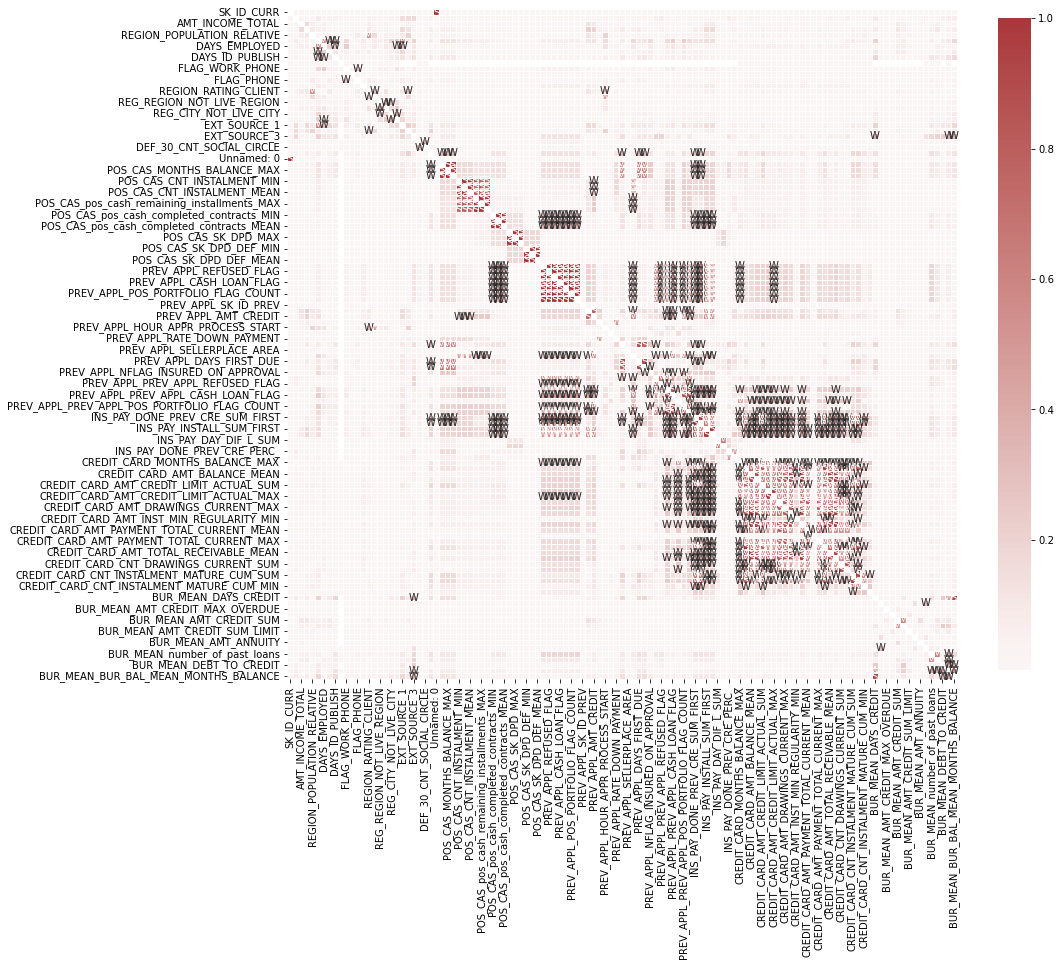

In [35]:
df_corr = train.corr(method= "pearson").abs()
# Create labels for the correlation matrix: 
# - strong relationshop: absolute corr > 0.75
# - medium relationship: absolute corr > 0.5
# - weak relationship: absolute corr > 0.25
labels = np.where(np.abs(df_corr)> 0.75, "S",
                  np.where(np.abs(df_corr)> 0.5, "M",
                  np.where(np.abs(df_corr)> 0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask= np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})


In [36]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values(ascending= False)
df_corr_stacked = pd.DataFrame(df_corr_stacked)
df_corr_stacked

0
POS_CAS_pos_cash_completed_contracts_MEAN    POS_CAS_pos_cash_completed_contracts_MAX     1.000000
POS_CAS_pos_cash_remaining_installments_MEAN POS_CAS_pos_cash_remaining_installments_MAX  1.000000
PREV_APPL_POS_PORTFOLIO_FLAG_COUNT           PREV_APPL_CONSUM_LOAN_FLAG                   1.000000
                                             PREV_APPL_CASH_LOAN_FLAG                     1.000000
                                             PREV_APPL_REVOL_LOAN_FLAG                    1.000000
...                                                                                            ...
CREDIT_CARD_AMT_BALANCE_MAX                  REG_REGION_NOT_LIVE_REGION                   0.000022
PREV_APPL_SK_ID_PREV                         AMT_INCOME_TOTAL                             0.000020
CREDIT_CARD_AMT_PAYMENT_TOTAL_CURRENT_MIN    PREV_APPL_PREV_APPL_CASH_LOAN_FLAG           0.000018
BUR_MEAN_AMT_CREDIT_MAX_OVERDUE              CREDIT_CARD_AMT_INST_MIN_REGULARITY_MAX      0.000016
                                             PREV_APPL_SELLERPLACE_AREA                   0.000011

[6952 rows x 1 columns]

In [37]:
# Drop features that have high correlations with others
df_corr_stacked.reset_index(inplace= True)
df_corr_stacked = df_corr_stacked.rename(columns = {'level_0': 'Feature 1', 'level_1': 'Feature 2', 0 : 'Corr'})
cols = list(df_corr_stacked[df_corr_stacked['Corr'] > 0.9]['Feature 1'].values)
reduced_train = train.drop(cols, axis = 1)

In [38]:
reduced_train.shape

(307511, 97)

In [39]:
reduced_test = test.drop(cols, axis = 1)

In [40]:
reduced_test.shape

(48744, 96)

**Check missing values**

In [41]:
total_missing_val = reduced_train.isnull().sum().sort_values(ascending= False)
total_missing_percent = (100 * total_missing_val / reduced_train.shape[0]).round(1).sort_values(ascending= False)
total_missing_percent

BUR_MEAN_AMT_ANNUITY                    74.0
EXT_SOURCE_1                            56.4
BUR_MEAN_AMT_CREDIT_MAX_OVERDUE         40.2
OCCUPATION_TYPE                         31.3
BUR_MEAN_AMT_CREDIT_SUM_LIMIT           21.2
                                        ... 
CREDIT_CARD_CNT_DRAWINGS_CURRENT_SUM     0.0
SK_ID_CURR                               0.0
TARGET                                   0.0
DAYS_REGISTRATION                        0.0
BUR_MEAN_PERC_ACTIVE_LOANS               0.0
Length: 97, dtype: float64

In [42]:
missing_val_data = pd.concat([total_missing_val, total_missing_percent], axis= 1, keys=['Total', 'Percent'])
missing_val_data = missing_val_data[missing_val_data.iloc[:, 1] != 0]
missing_val_data

,Total,Percent
BUR_MEAN_AMT_ANNUITY,227502,74.0
EXT_SOURCE_1,173378,56.4
BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,123625,40.2
OCCUPATION_TYPE,96391,31.3
BUR_MEAN_AMT_CREDIT_SUM_LIMIT,65069,21.2
EXT_SOURCE_3,60965,19.8
BUR_MEAN_AMT_CREDIT_SUM_DEBT,51380,16.7
BUR_MEAN_DEBT_TO_CREDIT,45058,14.7
BUR_MEAN_AMT_CREDIT_SUM,44021,14.3
BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,44020,14.3


In [43]:
# Drop variables that have more than 60% of missing values in train
cols_with_missing_to_reduce = [col for col in missing_val_data.index if missing_val_data.loc[col, "Percent"] > 60]
reduced_train = reduced_train.drop(cols_with_missing_to_reduce, axis= 1).reset_index(drop= True)

In [44]:
reduced_test = reduced_test.drop(cols_with_missing_to_reduce, axis= 1).reset_index(drop= True)

In [45]:
# Fill missing values for numercial features in train
train_numerical = reduced_train.select_dtypes(include= "number")
reduced_train.fillna(0, inplace=True)

In [46]:
# Fill missing values for object features in train
train_obj = reduced_train.select_dtypes(exclude= "number")
train_obj.fillna('Unknown', inplace= True)

In [47]:
reduced_train.isnull().sum() 

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                                ..
BUR_MEAN_OVERDUE                 0
BUR_MEAN_number_of_past_loans    0
BUR_MEAN_number_of_loan_types    0
BUR_MEAN_DEBT_TO_CREDIT          0
BUR_MEAN_PERC_ACTIVE_LOANS       0
Length: 96, dtype: int64

In [48]:
reduced_test.fillna(0, inplace= True)
reduced_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,BUR_MEAN_CNT_CREDIT_PROLONG,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_AMT_CREDIT_SUM_LIMIT,BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,BUR_MEAN_OVERDUE,BUR_MEAN_number_of_past_loans,BUR_MEAN_number_of_loan_types,BUR_MEAN_DEBT_TO_CREDIT,BUR_MEAN_PERC_ACTIVE_LOANS
0,100001,Cash loans,F,N,135000.0,568800.0,Unaccompanied,Working,Higher education,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,99000.0,222768.0,Unaccompanied,Working,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100013,Cash loans,M,Y,202500.0,663264.0,0,Working,Higher education,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100028,Cash loans,F,N,315000.0,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100038,Cash loans,M,Y,180000.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,121500.0,412560.0,Unaccompanied,Working,Secondary / secondary special,Widow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48740,456222,Cash loans,F,N,157500.0,622413.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48741,456223,Cash loans,F,Y,202500.0,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48742,456224,Cash loans,M,N,225000.0,450000.0,Family,Commercial associate,Higher education,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Drop columns of numeric type that have percent of unique values > 80 percent**

In [49]:
numeric_df = reduced_train._get_numeric_data()
numeric_df.drop([ "SK_ID_CURR", "TARGET"], axis= 1, inplace= True)


count_list =[]
for i in numeric_df.columns:
    percent = pd.Series(numeric_df[i].value_counts(normalize= True)*100) #percent
    count_list.append([i, percent.index[0], percent.values[0] ])

unique_per = pd.DataFrame(count_list)
unique_per.columns = ["Feature", "Value", "Percentage"]
unique_per = unique_per.sort_values(by= "Percentage",ascending= False)
drop_list = unique_per[unique_per["Percentage"] > 80 ]["Feature"].tolist()
drop_list

['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'CREDIT_CARD_AMT_PAYMENT_TOTAL_CURRENT_MIN',
 'POS_CAS_SK_DPD_DEF_MIN',
 'BUR_MEAN_AMT_CREDIT_SUM_OVERDUE',
 'BUR_MEAN_OVERDUE',
 'BUR_MEAN_CREDIT_DAY_OVERDUE',
 'REG_REGION_NOT_LIVE_REGION',
 'CREDIT_CARD_AMT_INST_MIN_REGULARITY_MIN',
 'POS_CAS_SK_DPD_MIN',
 'BUR_MEAN_CNT_CREDIT_PROLONG',
 'CREDIT_CARD_COMPLETE_CNT_FIRST',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_EMAIL',
 'PREV_APPL_NFLAG_LAST_APPL_IN_DAY',
 'REG_CITY_NOT_LIVE_CITY',
 'CREDIT_CARD_CNT_INSTALMENT_MATURE_CUM_MIN',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'BUR_MEAN_AMT_CREDIT_SUM_LIMIT',
 'CREDIT_CARD_CNT_DRAWINGS_CURRENT_MAX',
 'CREDIT_CARD_CNT_DRAWINGS_CURRENT_SUM',
 'CREDIT_CARD_CNT_INSTALMENT_MATURE_CUM_SUM',
 'CREDIT_CARD_AMT_BALANCE_MEAN',
 'CREDIT_CARD_AMT_BALANCE_SUM',
 'CREDIT_CARD_AMT_DRAWINGS_CURRENT_MAX',
 'CREDIT_CARD_AMT_DRAWINGS_CURRENT_SUM',
 'CREDIT_CARD_AMT_PAYMENT_TOTAL_CURRENT_MAX',
 'CREDIT_CARD_AMT_PAYMENT_TOTAL_CURRENT_MEAN',
 'FLAG_WORK_PHONE']

In [50]:
reduced_train.drop(drop_list, inplace = True, axis = 1)

In [51]:
reduced_test = reduced_test.drop(drop_list, axis= 1).reset_index(drop= True)
reduced_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_SUM,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_MEAN,BUR_MEAN_DAYS_CREDIT,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_number_of_past_loans,BUR_MEAN_number_of_loan_types,BUR_MEAN_DEBT_TO_CREDIT,BUR_MEAN_PERC_ACTIVE_LOANS
0,100001,Cash loans,F,N,135000.0,568800.0,Unaccompanied,Working,Higher education,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,99000.0,222768.0,Unaccompanied,Working,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100013,Cash loans,M,Y,202500.0,663264.0,0,Working,Higher education,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100028,Cash loans,F,N,315000.0,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100038,Cash loans,M,Y,180000.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,121500.0,412560.0,Unaccompanied,Working,Secondary / secondary special,Widow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48740,456222,Cash loans,F,N,157500.0,622413.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48741,456223,Cash loans,F,Y,202500.0,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48742,456224,Cash loans,M,N,225000.0,450000.0,Family,Commercial associate,Higher education,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
reduced_train.shape

(307511, 67)

**Structure of numerical features**

In [53]:
# Select all numerical features
unique_val = reduced_train.select_dtypes(include= "number").nunique().sort_values()
unique_val

REG_CITY_NOT_WORK_CITY                               2
TARGET                                               2
FLAG_PHONE                                           2
REGION_RATING_CLIENT                                 3
CREDIT_CARD_MONTHS_BALANCE_MAX                       6
BUR_MEAN_number_of_loan_types                        7
HOUR_APPR_PROCESS_START                             24
OBS_30_CNT_SOCIAL_CIRCLE                            33
POS_CAS_pos_cash_completed_contracts_MIN            47
POS_CAS_CNT_INSTALMENT_MIN                          58
BUR_MEAN_number_of_past_loans                       61
POS_CAS_pos_cash_remaining_installments_MIN         64
PREV_APPL_APPROVED_FLAG                             66
REGION_POPULATION_RELATIVE                          81
POS_CAS_MONTHS_BALANCE_MIN                          97
PREV_APPL_PREV_APPL_REVOL_LOAN_FLAG                278
PREV_APPL_NFLAG_INSURED_ON_APPROVAL                286
INS_PAY_DONE_PREV_CRE_SUM_FIRST                    302
BUR_MEAN_P

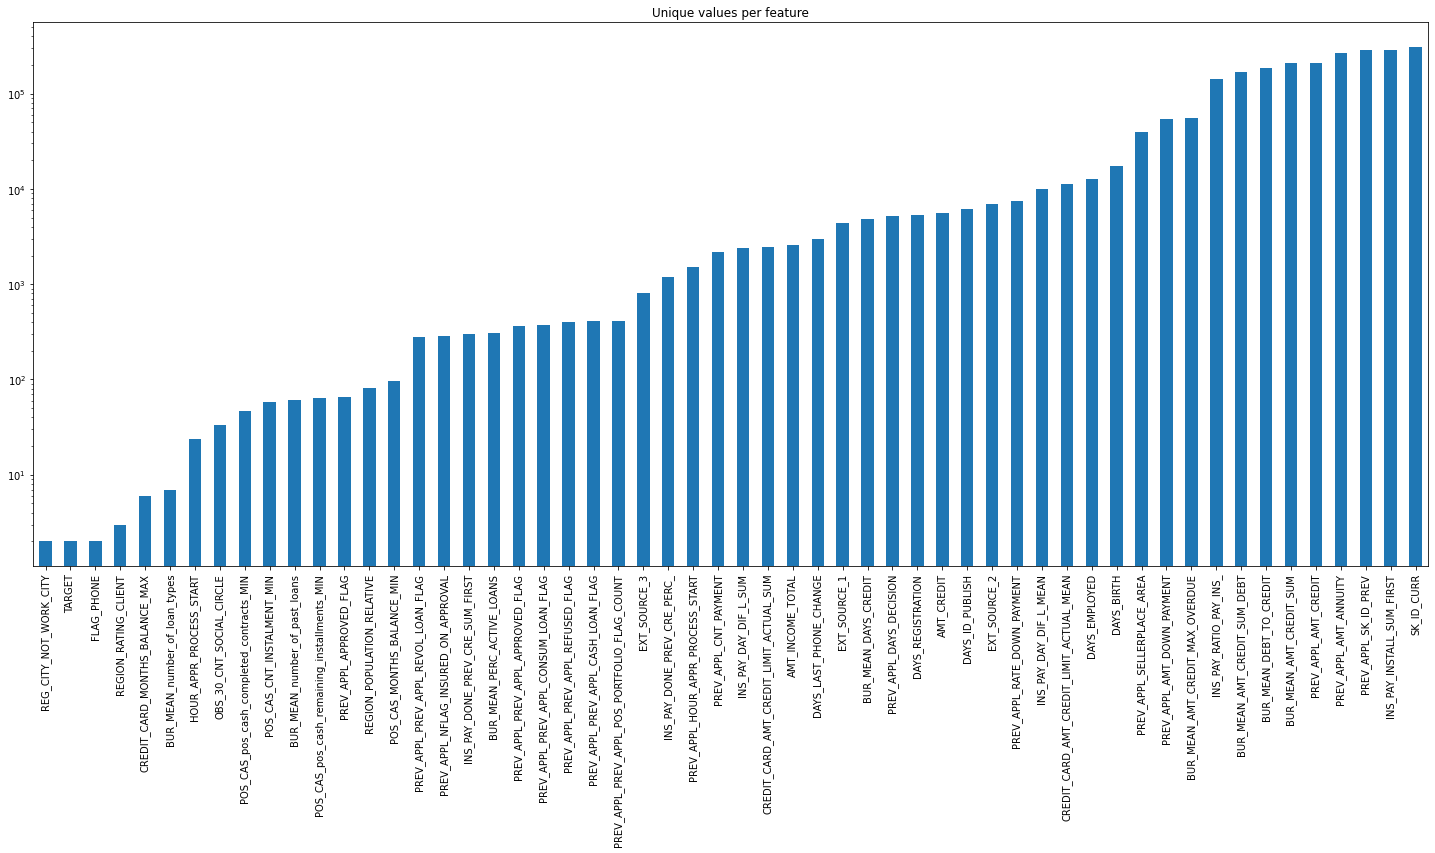

In [54]:
# Plot the unique values of each features
unique_val.plot.bar(logy=True, figsize=(25, 10), title="Unique values per feature");

**Structure of categorical features**

In [55]:
# Select all categorical features
reduced_train.select_dtypes(exclude= "number").head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [56]:
reduced_train.describe(exclude= "number")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,8,8,5,6,6,19,7,58
top,Cash loans,F,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0,TUESDAY,Business Entity Type 3
freq,278232,202448,202924,248526,158774,218391,196432,272868,96391,53901,67992


In [57]:
reduced_train.shape

(307511, 67)

**Handling outliers**

In [58]:
numeric_feats = reduced_train.select_dtypes(include= "number")
numeric_feats.head()
# 56 cột là numeric

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,...,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_SUM,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_MEAN,BUR_MEAN_DAYS_CREDIT,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_number_of_past_loans,BUR_MEAN_number_of_loan_types,BUR_MEAN_DEBT_TO_CREDIT,BUR_MEAN_PERC_ACTIVE_LOANS
0,100002,1.0,202500.0,406597.5,0.018799,-9461,-637,-3648.0,-2120,1,...,0.0,0.0,-874.0,1681.029053,108131.945312,49156.199219,8.0,2.0,28.412163,25.0
1,100003,0.0,270000.0,1293502.5,0.003542,-16765,-1188,-1186.0,-291,1,...,0.0,0.0,-1401.0,0.000000,254350.125000,0.000000,4.0,2.0,0.000000,25.0
2,100004,0.0,67500.0,135000.0,0.010033,-19046,-225,-4260.0,-2531,1,...,0.0,0.0,-867.0,0.000000,94518.898438,0.000000,2.0,1.0,0.000000,0.0
3,100006,0.0,135000.0,312682.5,0.008018,-19005,-3039,-9832.0,-2437,0,...,1620000.0,270000.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,100.0
4,100007,0.0,121500.0,513000.0,0.028656,-19932,-3038,-4312.0,-3458,0,...,0.0,0.0,-1149.0,0.000000,146250.000000,0.000000,1.0,1.0,0.000000,0.0


C:\Users\ACER\AppData\Local\Temp\ipykernel_3836\795403283.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize = (10, 7))
c:\Users\ACER\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


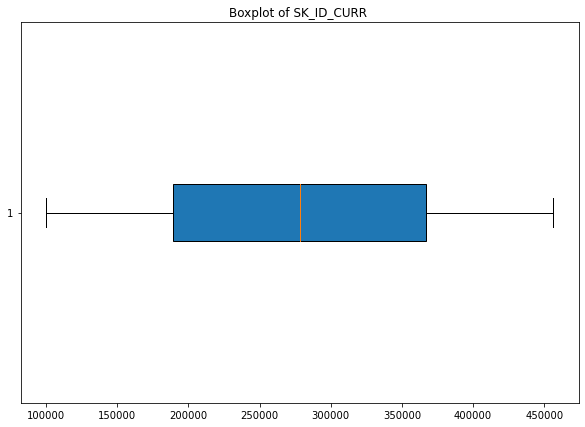

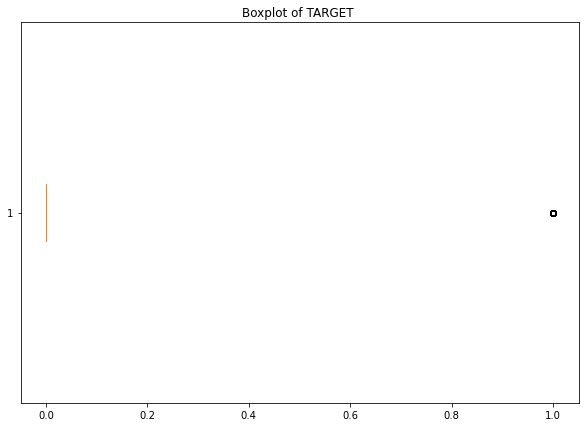

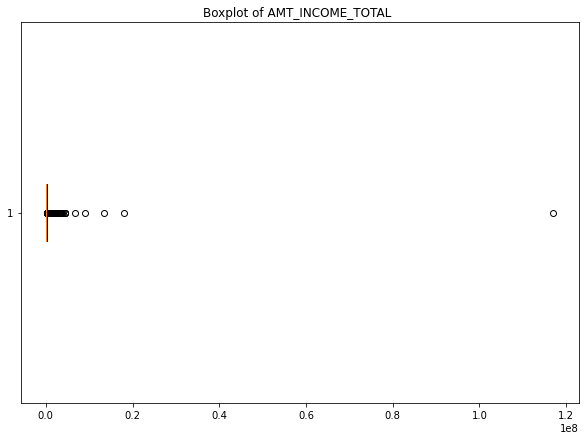

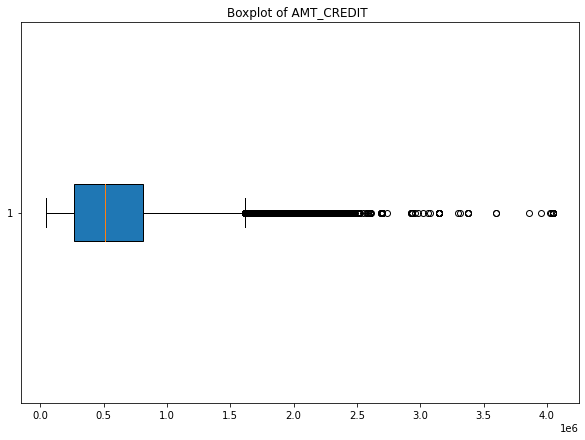

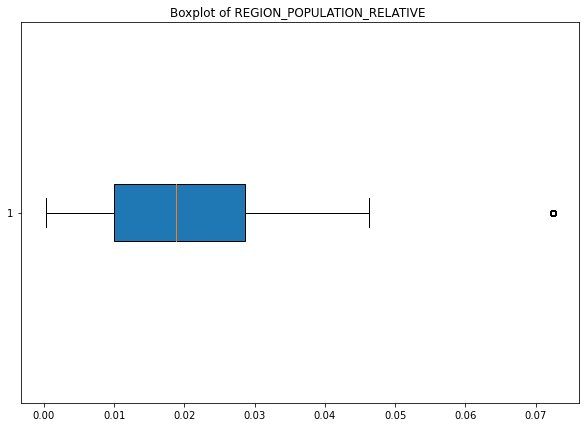

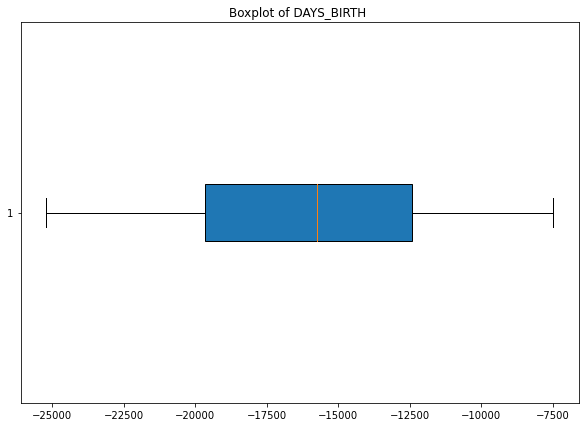

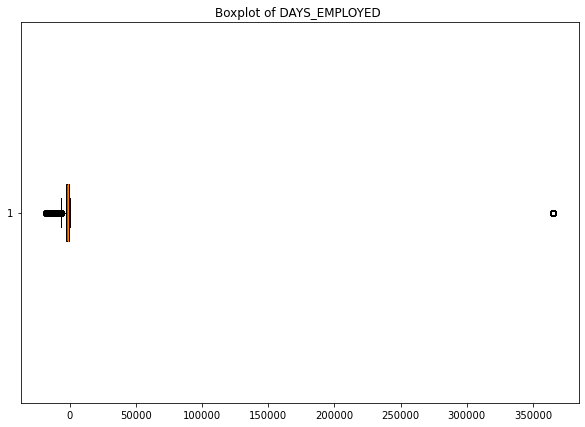

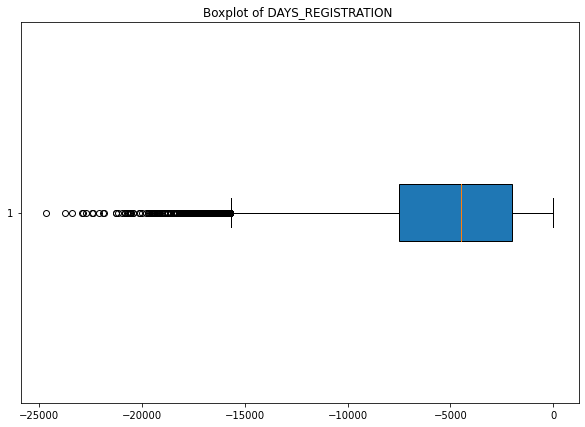

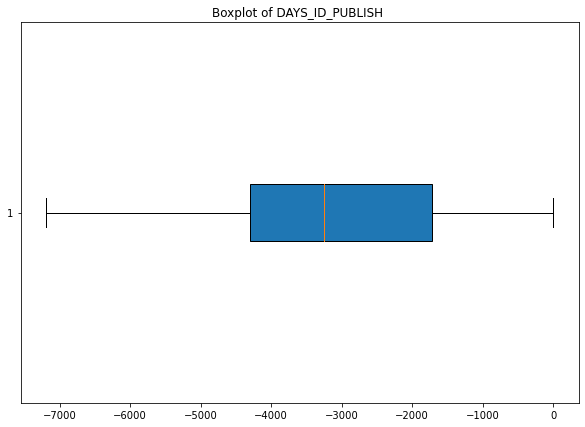

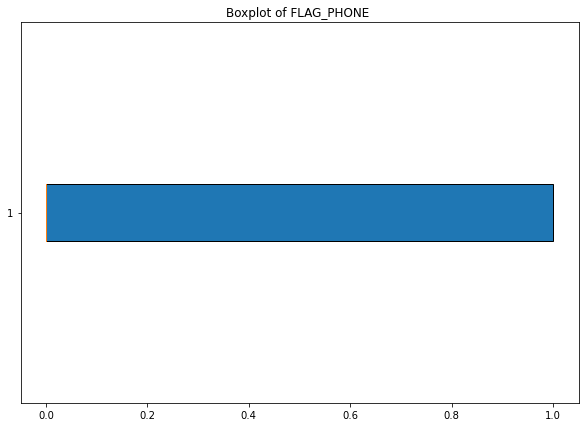

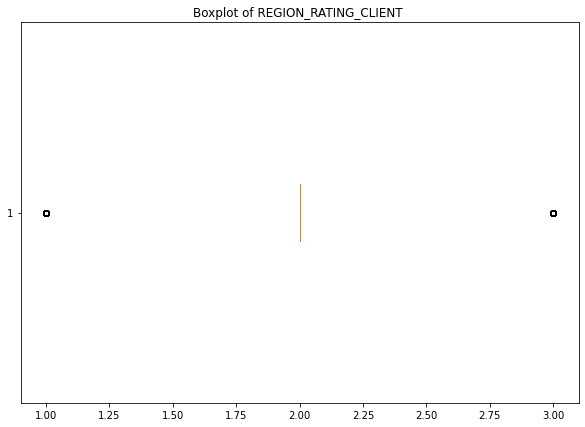

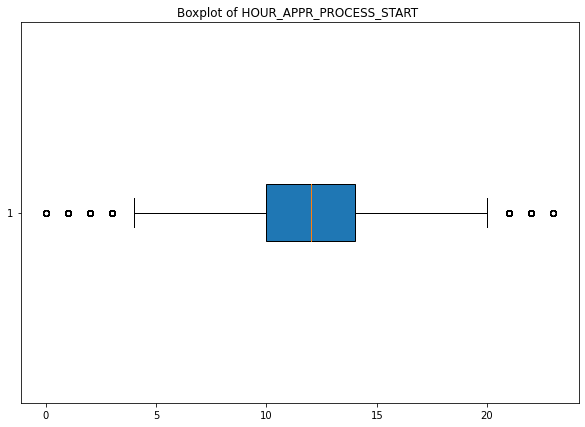

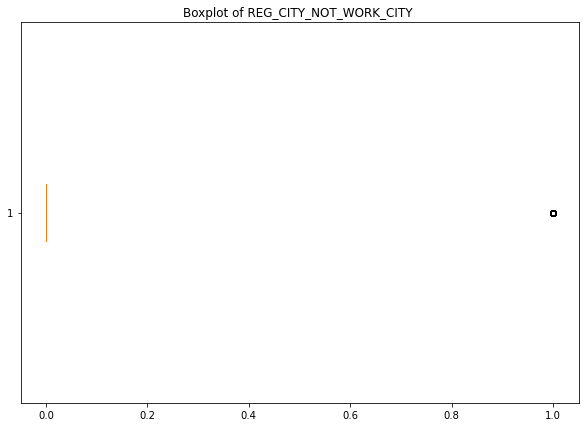

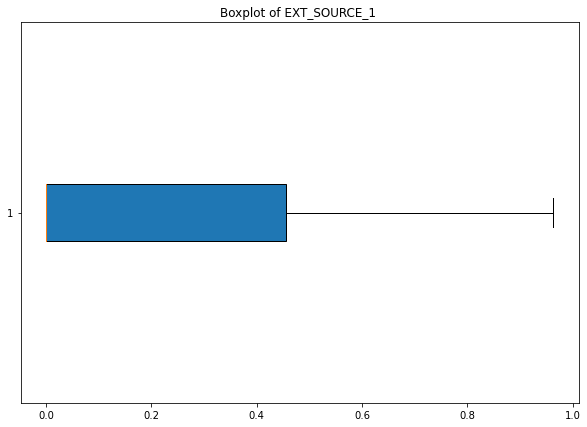

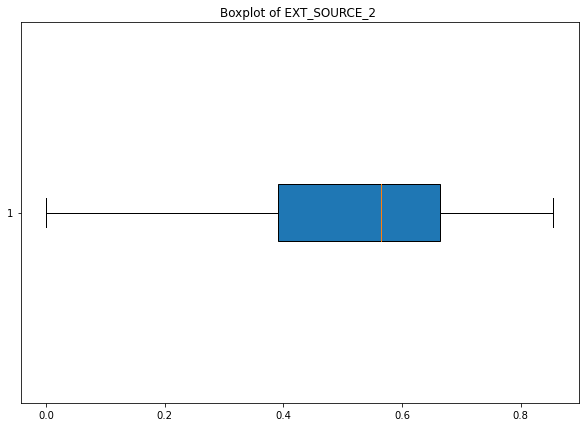

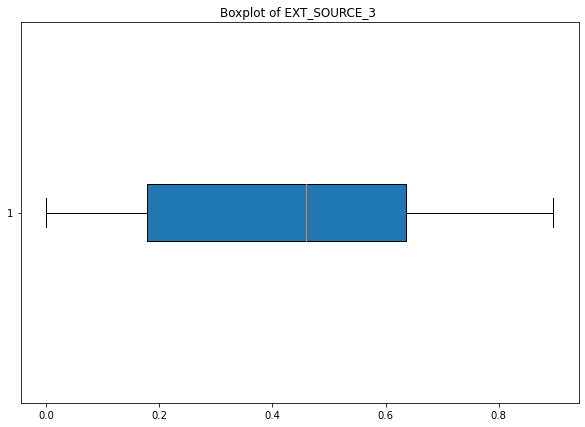

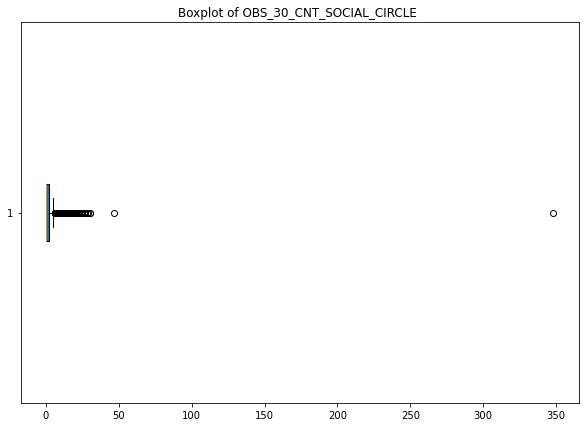

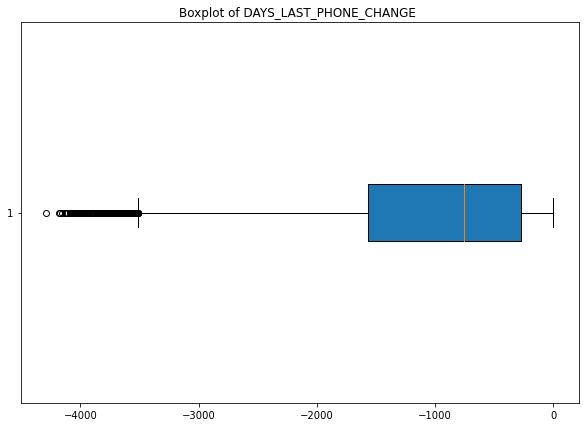

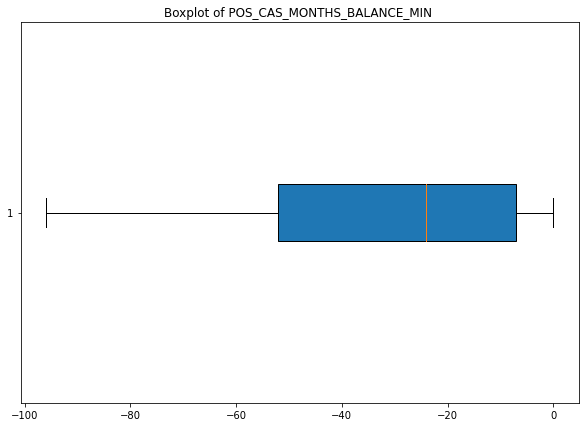

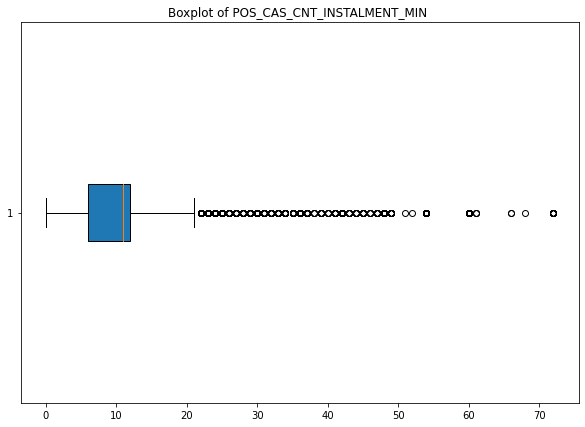

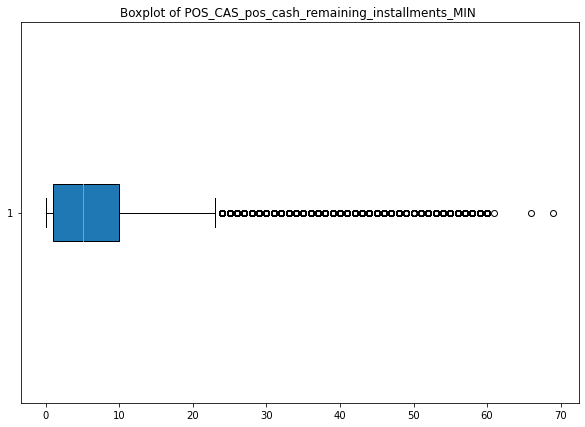

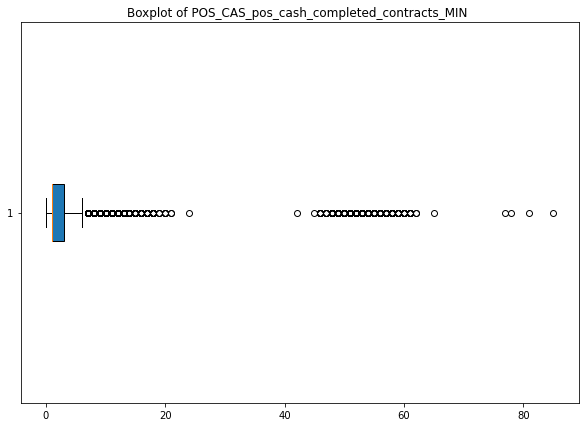

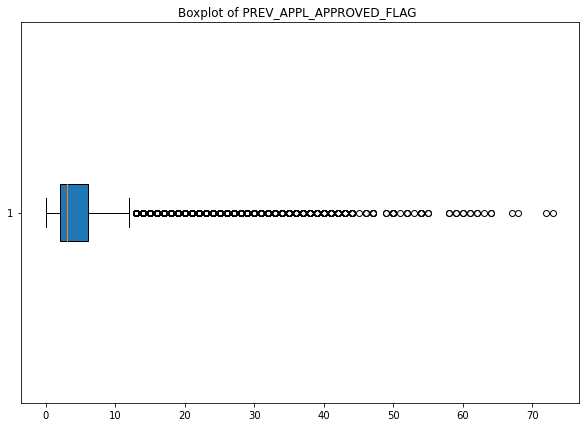

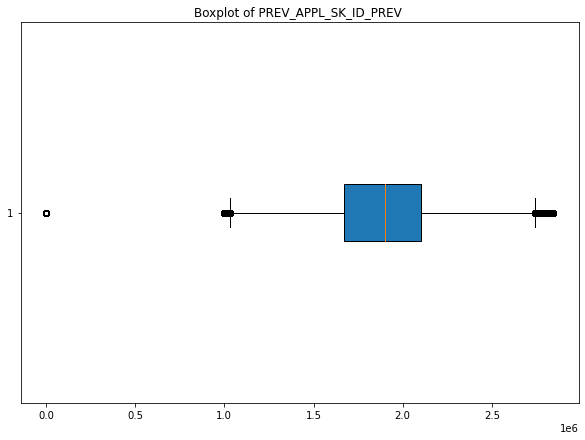

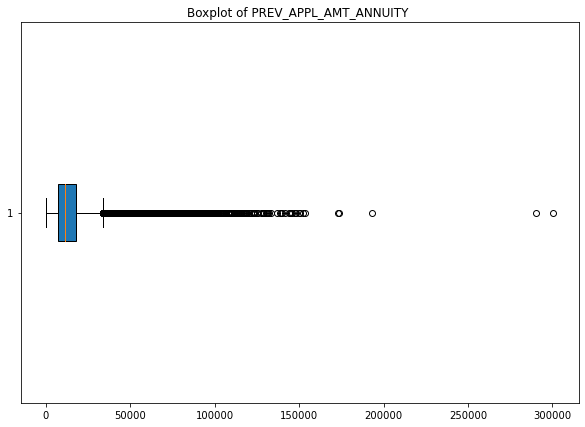

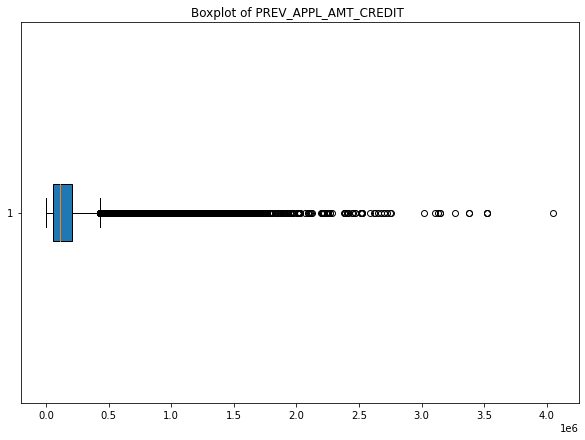

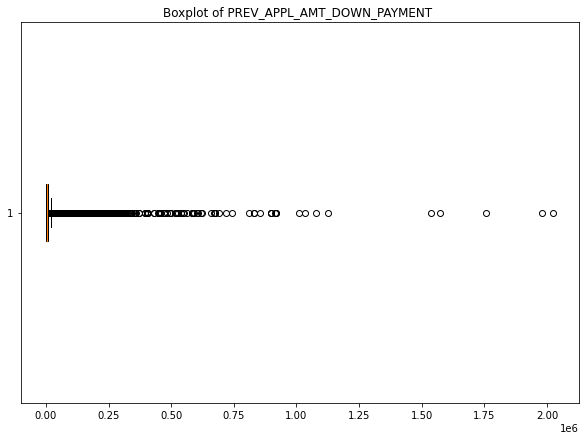

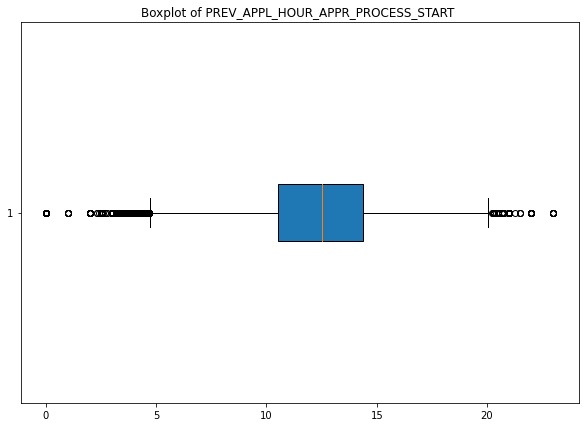

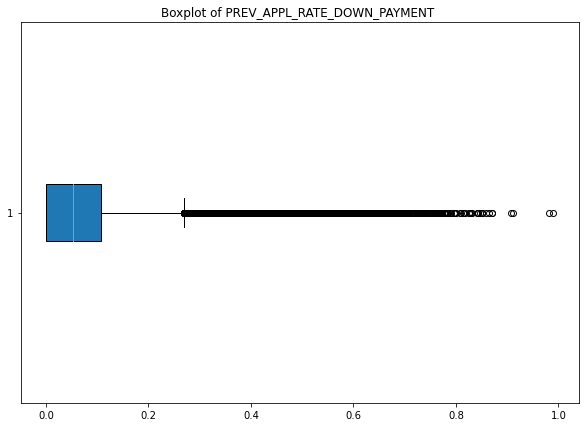

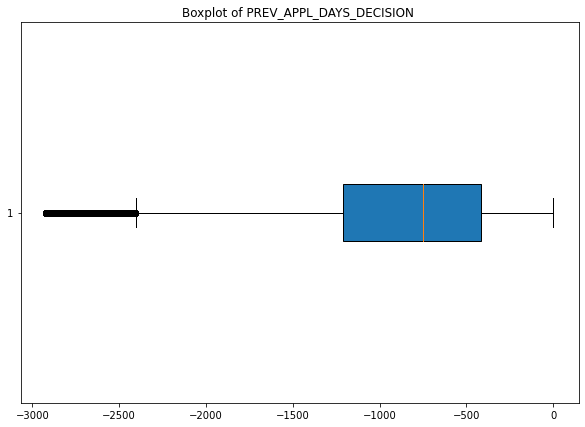

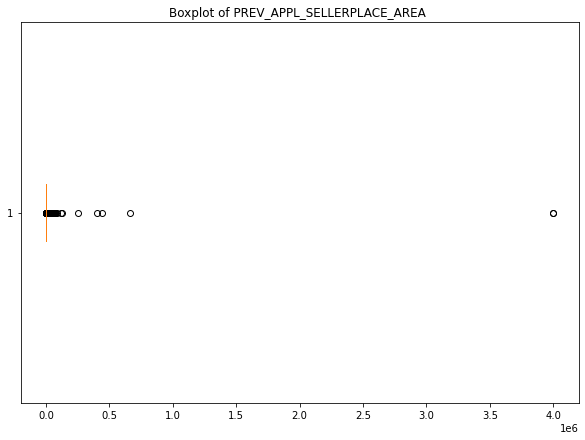

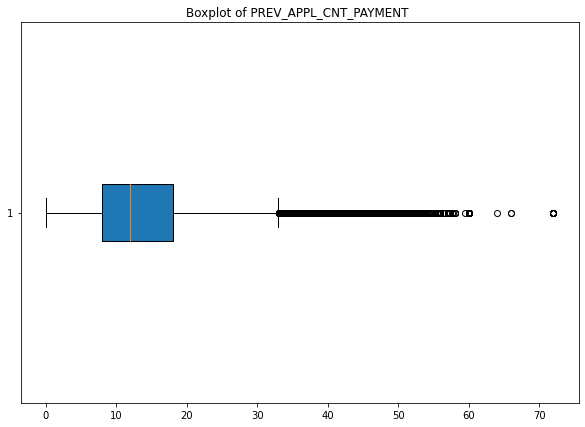

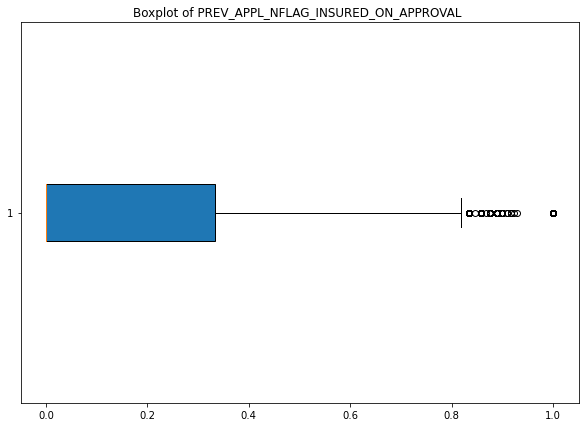

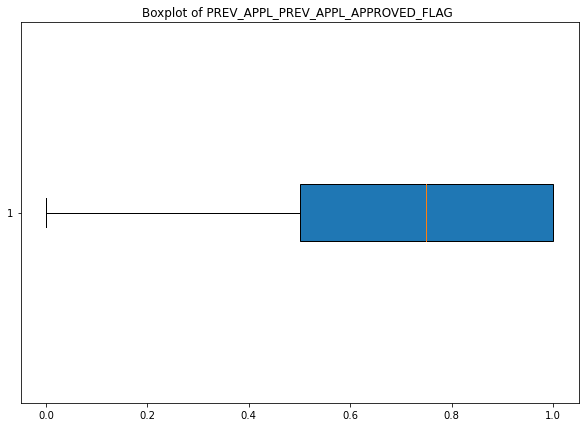

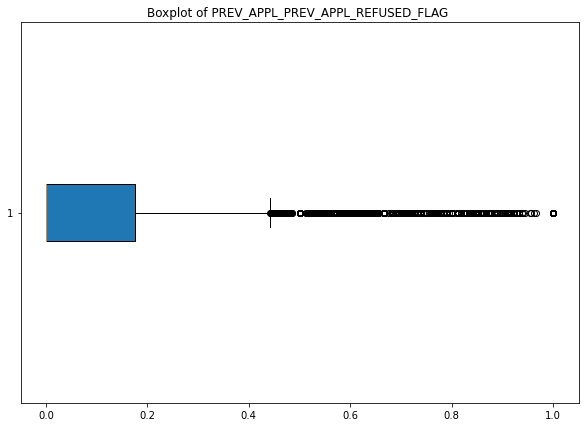

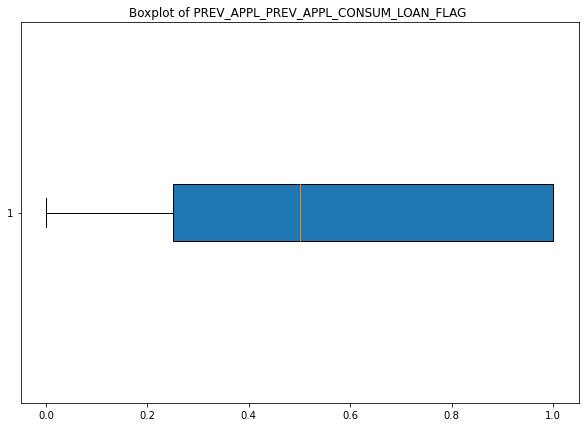

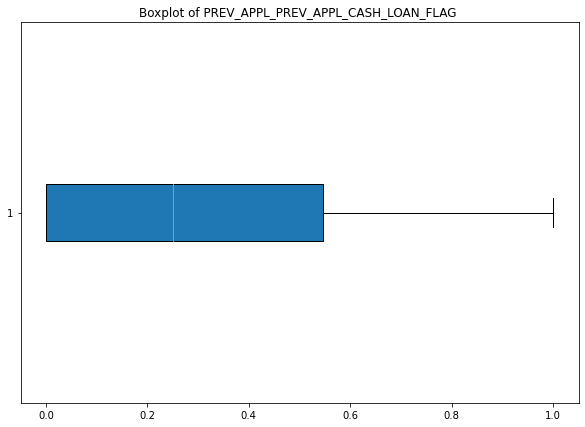

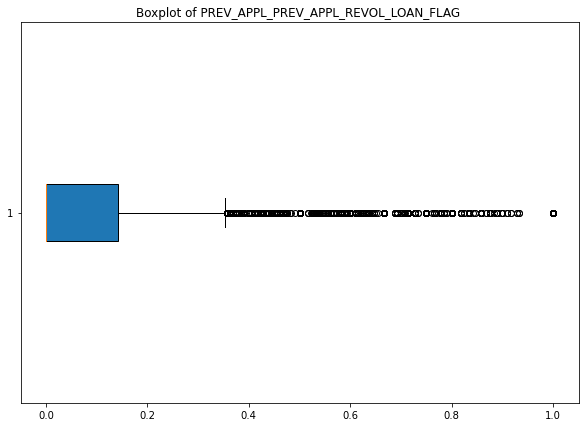

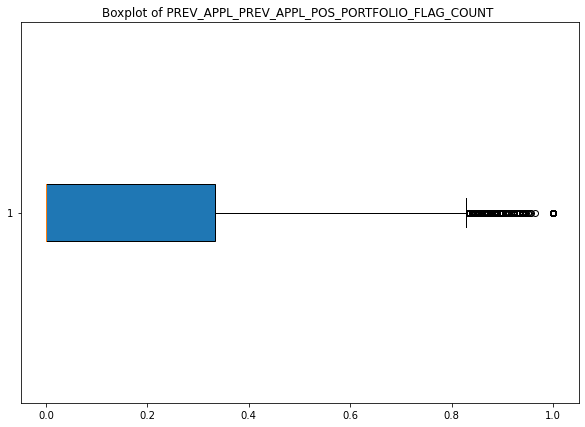

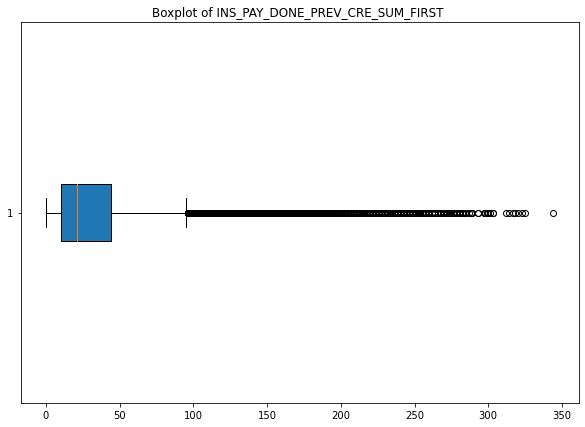

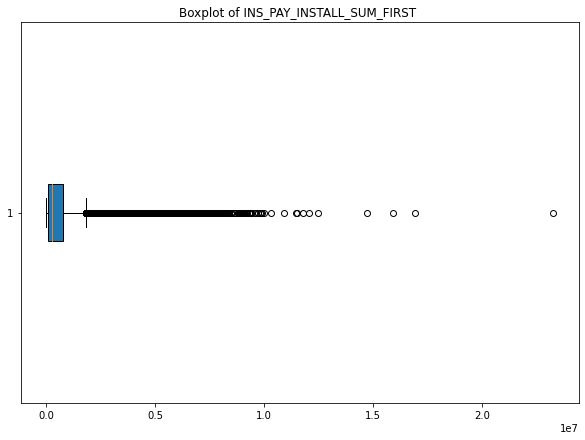

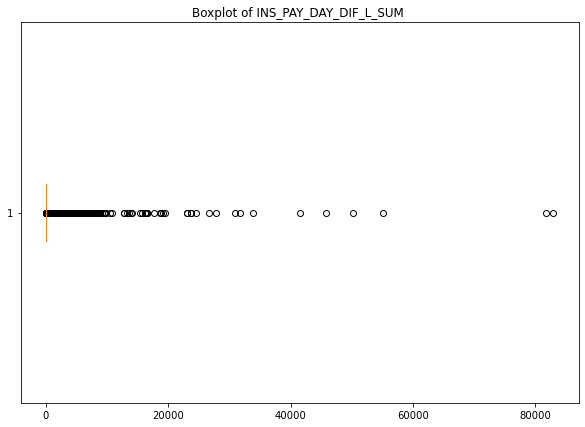

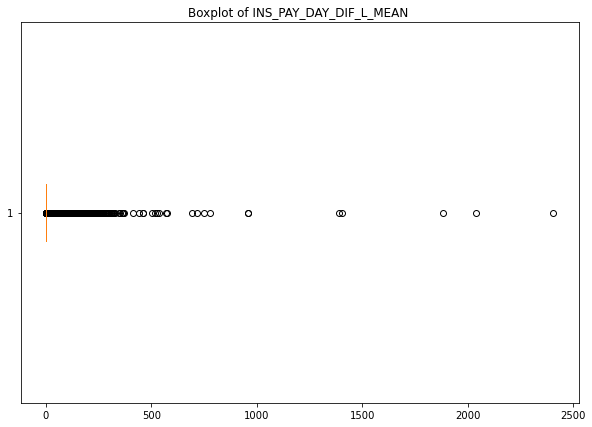

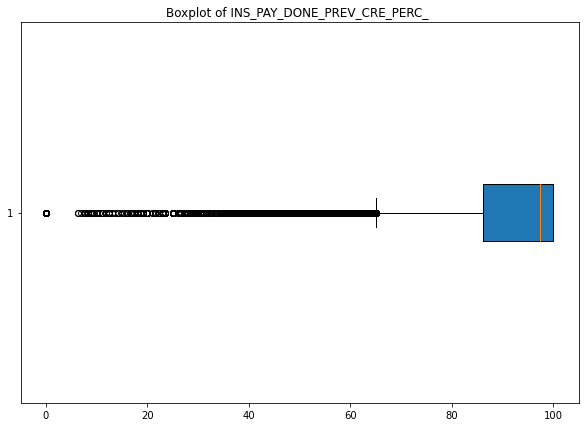

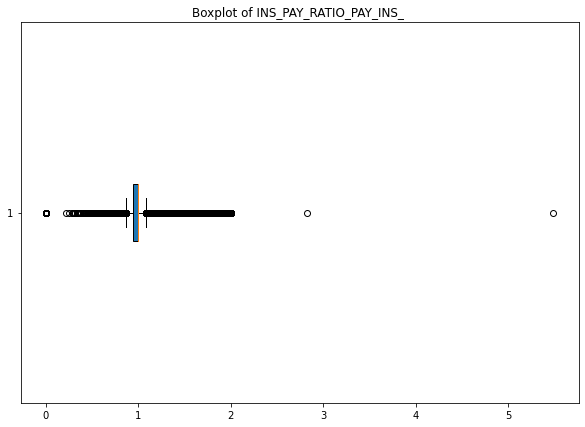

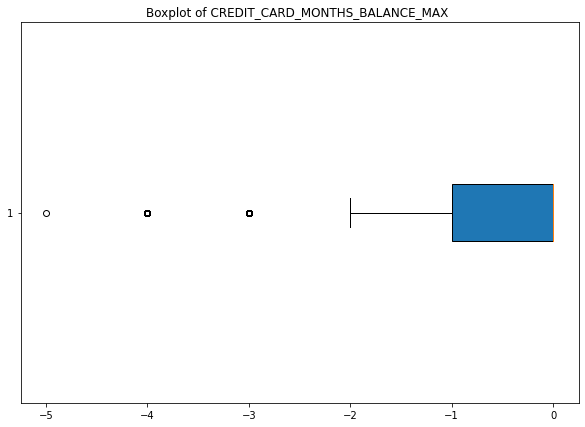

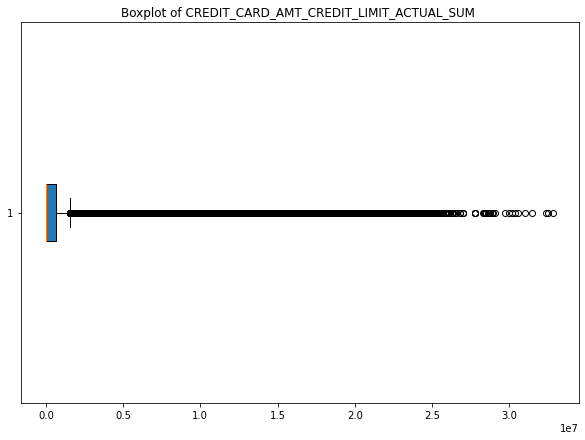

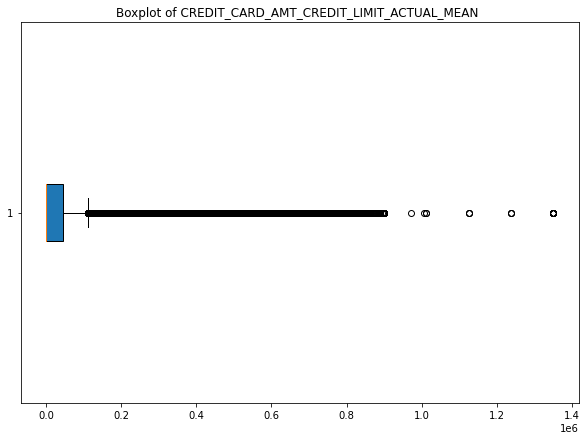

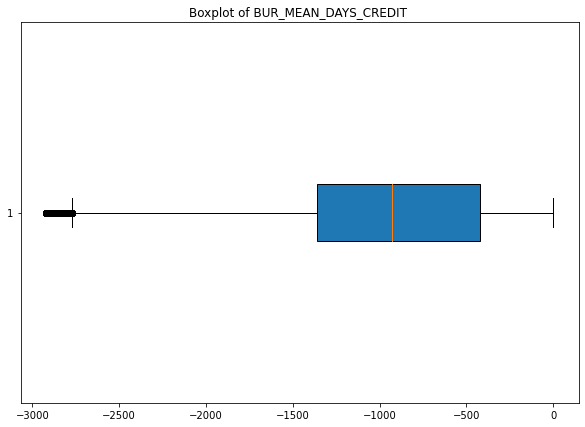

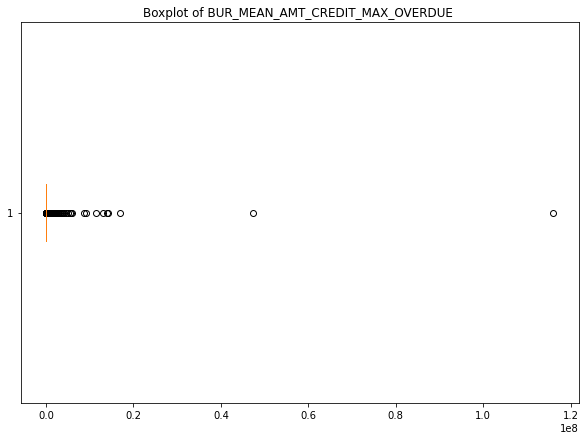

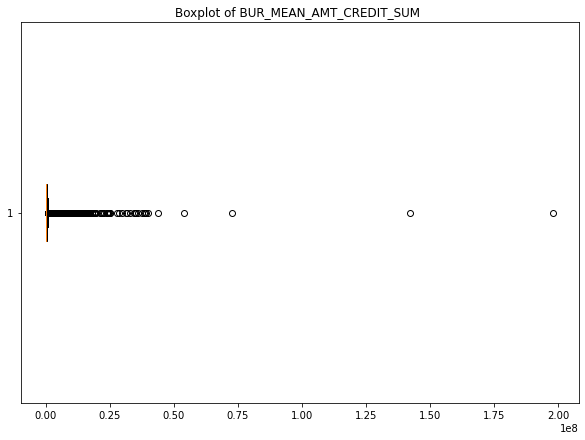

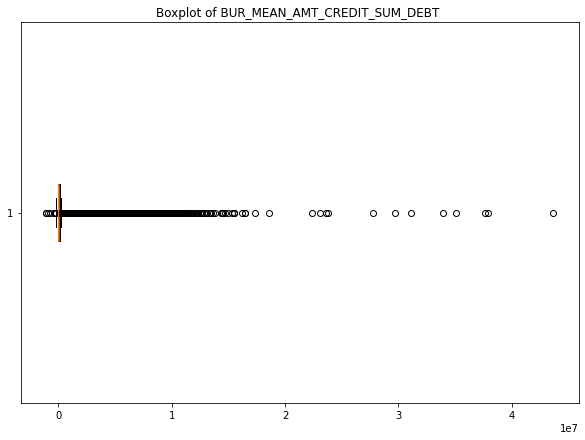

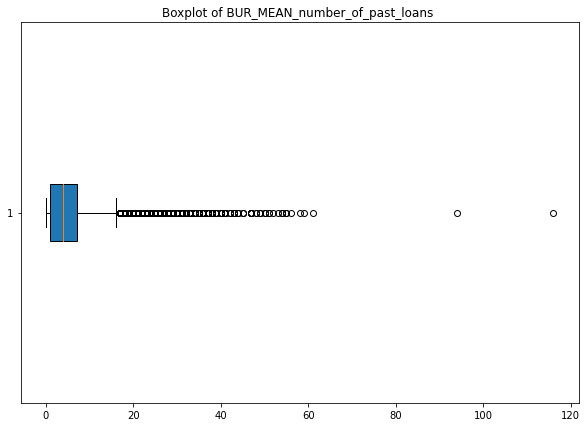

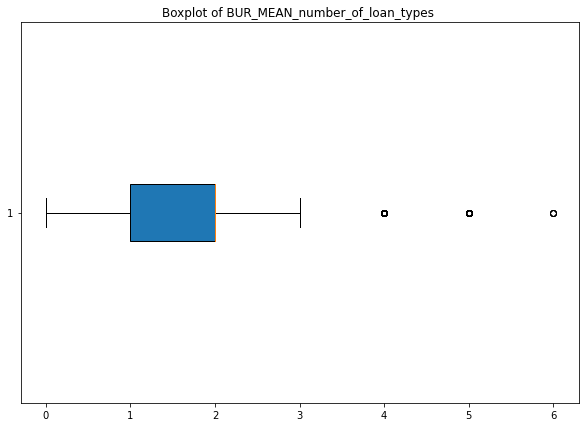

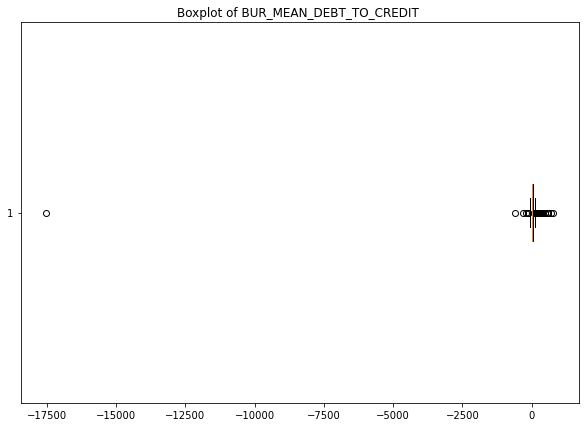

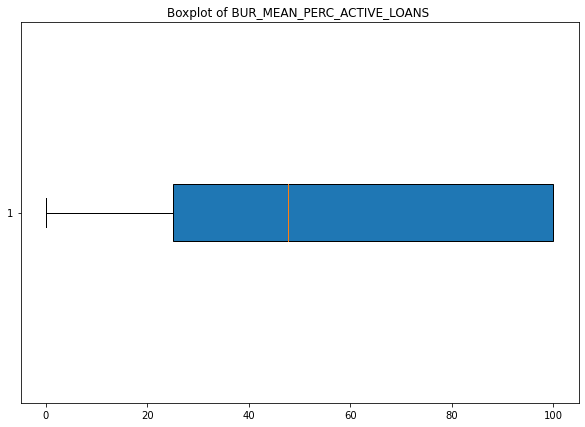

In [59]:
for feat in numeric_feats:
    fig, ax = plt.subplots(1, 1, figsize = (10, 7))
    plt.boxplot(reduced_train[feat].dropna(), patch_artist =True, vert = False)
    ax.set_title(f"Boxplot of {feat} ")

In [60]:
numeric_feats

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,...,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_SUM,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_MEAN,BUR_MEAN_DAYS_CREDIT,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_number_of_past_loans,BUR_MEAN_number_of_loan_types,BUR_MEAN_DEBT_TO_CREDIT,BUR_MEAN_PERC_ACTIVE_LOANS
0,100002,1.0,202500.0,406597.5,0.018799,-9461,-637,-3648.0,-2120,1,...,0.0,0.0,-874.0,1681.029053,108131.945312,49156.199219,8.0,2.0,28.412163,25.00000
1,100003,0.0,270000.0,1293502.5,0.003542,-16765,-1188,-1186.0,-291,1,...,0.0,0.0,-1401.0,0.000000,254350.125000,0.000000,4.0,2.0,0.000000,25.00000
2,100004,0.0,67500.0,135000.0,0.010033,-19046,-225,-4260.0,-2531,1,...,0.0,0.0,-867.0,0.000000,94518.898438,0.000000,2.0,1.0,0.000000,0.00000
3,100006,0.0,135000.0,312682.5,0.008018,-19005,-3039,-9832.0,-2437,0,...,1620000.0,270000.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,100.00000
4,100007,0.0,121500.0,513000.0,0.028656,-19932,-3038,-4312.0,-3458,0,...,0.0,0.0,-1149.0,0.000000,146250.000000,0.000000,1.0,1.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,157500.0,254700.0,0.032562,-9327,-236,-8456.0,-1982,0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,100.00000
307507,456252,0.0,72000.0,269550.0,0.025162,-20775,365243,-4388.0,-4090,1,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,100.00000
307508,456253,0.0,153000.0,677664.0,0.005001,-14966,-7921,-6736.0,-5150,0,...,0.0,0.0,-867.5,0.000000,990000.000000,448958.250000,4.0,2.0,45.349318,50.00000
307509,456254,1.0,171000.0,370107.0,0.005314,-11961,-4786,-2562.0,-931,0,...,0.0,0.0,-1104.0,0.000000,45000.000000,0.000000,1.0,1.0,0.000000,0.00000


In [61]:
numeric_feats.drop(['TARGET'], axis = 1, inplace = True)

In [62]:
# Handle outliers
for feat in numeric_feats.columns:
    Q1 = reduced_train[feat].quantile(0.25)
    Q3 = reduced_train[feat].quantile(0.75)
    IQR = Q3 - Q1
    S = 1.5 * IQR
    lower_bridge = Q1 - S
    upper_bridge = Q3 + S
    reduced_train.loc[reduced_train[feat] > upper_bridge, feat] = upper_bridge
    reduced_train.loc[reduced_train[feat] < lower_bridge, feat] = lower_bridge

In [63]:
reduced_train[reduced_train['TARGET']==1]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_SUM,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_MEAN,BUR_MEAN_DAYS_CREDIT,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_number_of_past_loans,BUR_MEAN_number_of_loan_types,BUR_MEAN_DEBT_TO_CREDIT,BUR_MEAN_PERC_ACTIVE_LOANS
0,100002,1.0,Cash loans,M,N,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,...,0.0,0.000000,-874.0,0.0,108131.945312,49156.199219,8.0,2.0,28.412163,25.00000
26,100031,1.0,Cash loans,F,N,112500.0,979992.0,Unaccompanied,Working,Secondary / secondary special,...,0.0,0.000000,-579.5,0.0,567235.937500,282403.125000,7.0,2.0,28.332882,42.84375
40,100047,1.0,Cash loans,M,N,202500.0,1193580.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,1575000.0,112500.000000,-1105.0,0.0,760564.875000,282403.125000,5.0,3.0,33.801220,60.00000
42,100049,1.0,Cash loans,F,N,135000.0,288873.0,Unaccompanied,Working,Secondary / secondary special,...,1305000.0,100384.617188,-819.0,0.0,121678.265625,92073.750000,7.0,2.0,64.859864,71.43750
81,100096,1.0,Cash loans,F,N,81000.0,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,...,0.0,0.000000,-2772.0,0.0,65610.000000,0.000000,1.0,1.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1.0,Cash loans,M,N,207000.0,450000.0,Unaccompanied,Working,Secondary / secondary special,...,720000.0,55384.617188,-707.5,0.0,691066.812500,282403.125000,11.0,2.0,62.199999,36.37500
307475,456215,1.0,Cash loans,F,N,144000.0,1303200.0,Unaccompanied,Working,Higher education,...,1575000.0,35904.253906,-1083.0,0.0,484854.625000,124505.250000,10.0,2.0,15.407330,40.00000
307481,456225,1.0,Cash loans,M,N,225000.0,297000.0,Family,Working,Secondary / secondary special,...,1575000.0,112500.000000,-1053.0,0.0,412688.000000,282403.125000,9.0,2.0,75.317858,66.68750
307489,456233,1.0,Cash loans,F,N,225000.0,521280.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,1260000.0,112500.000000,-203.0,0.0,282663.312500,223943.890625,1.0,1.0,79.226374,100.00000


C:\Users\ACER\AppData\Local\Temp\ipykernel_3836\795403283.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize = (10, 7))


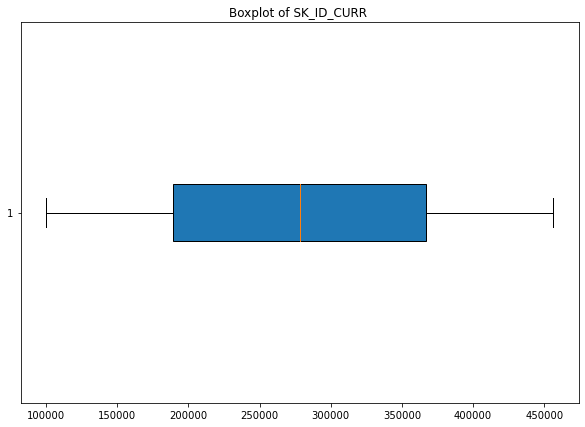

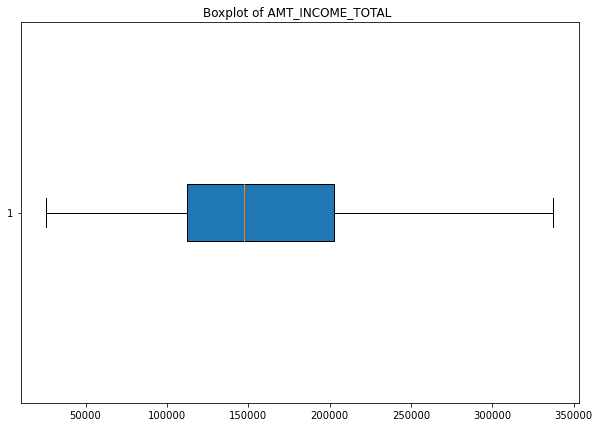

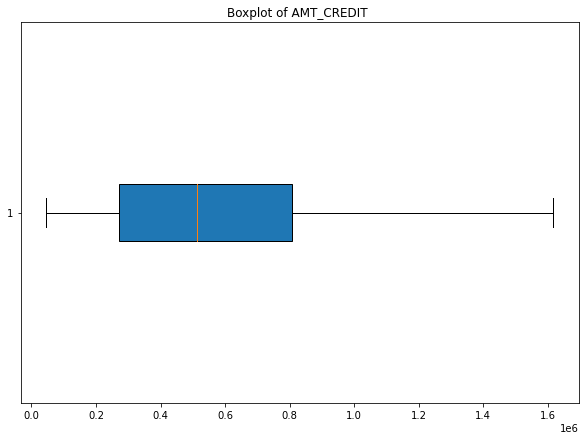

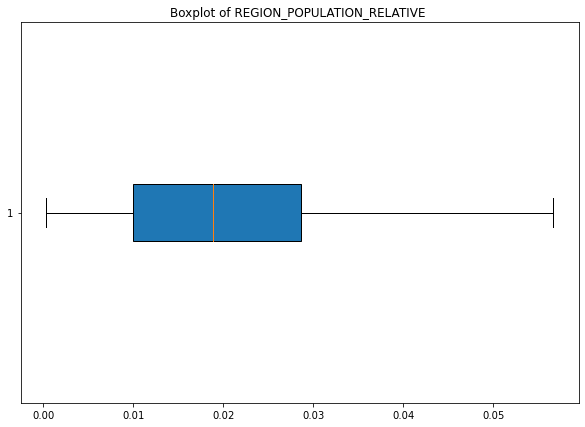

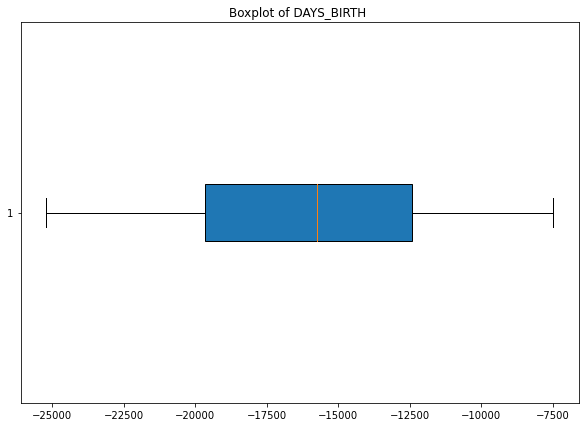

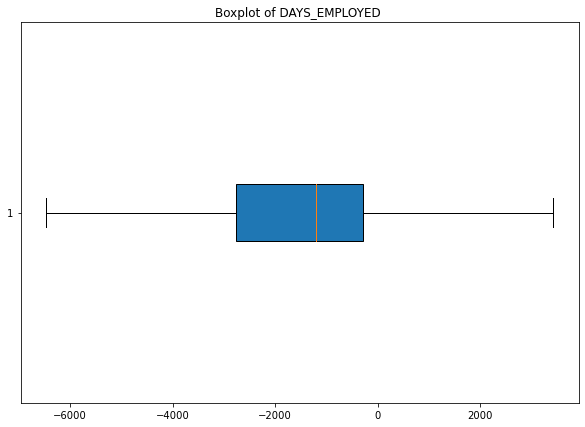

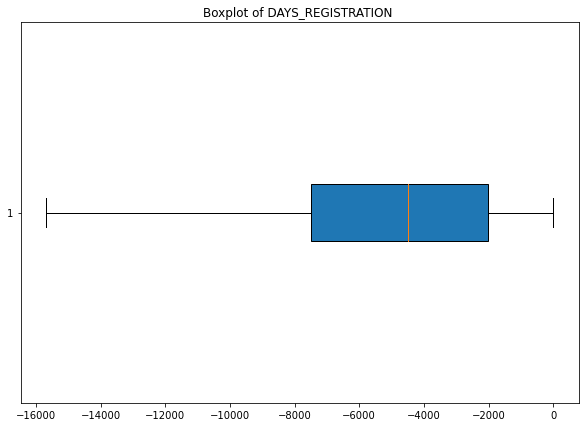

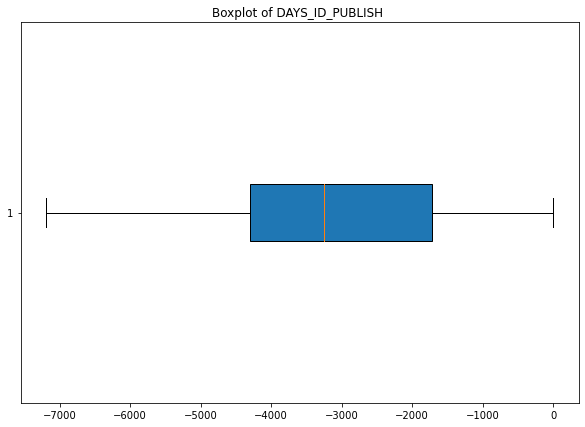

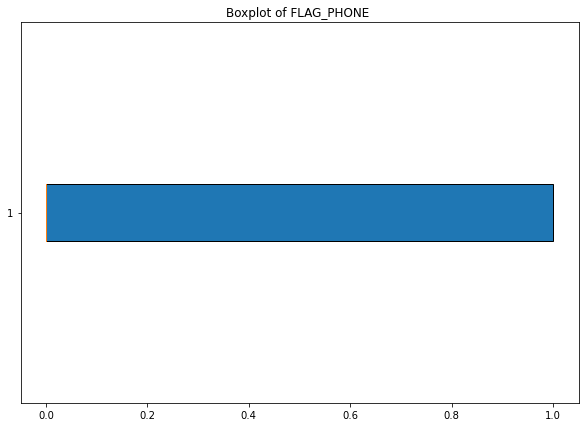

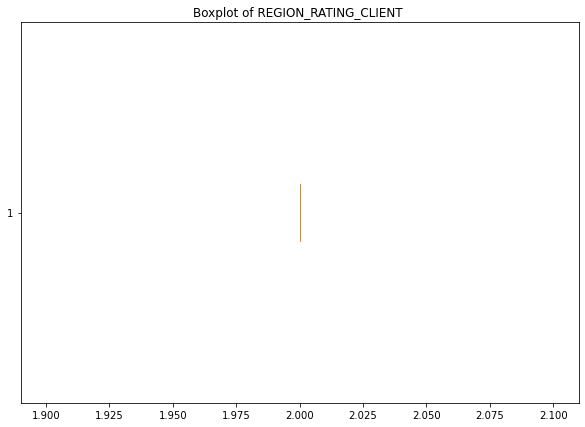

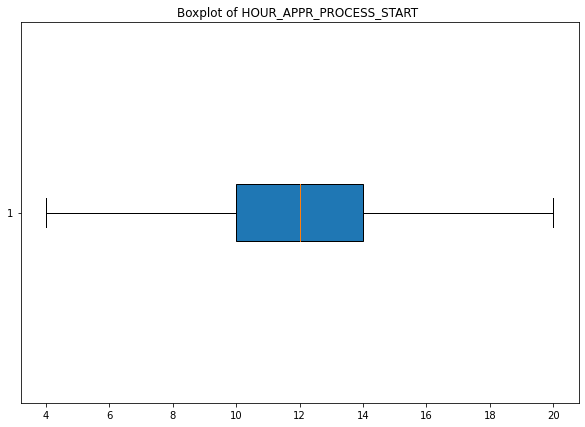

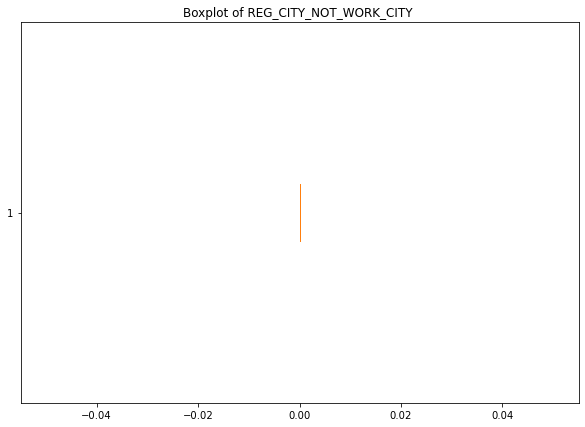

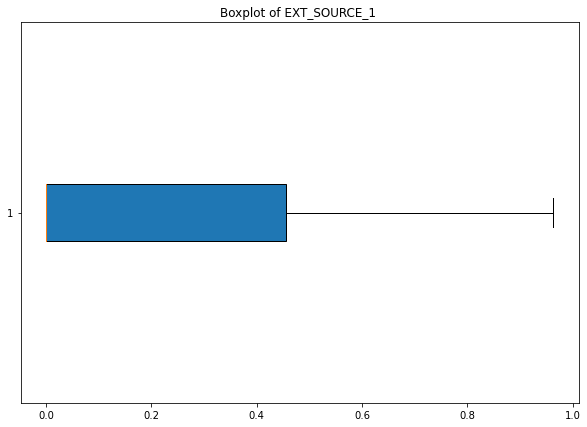

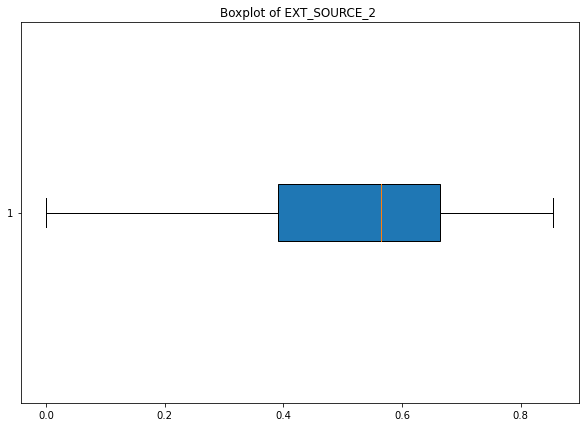

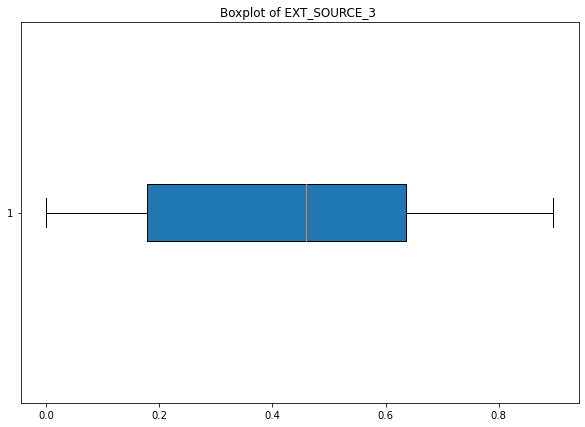

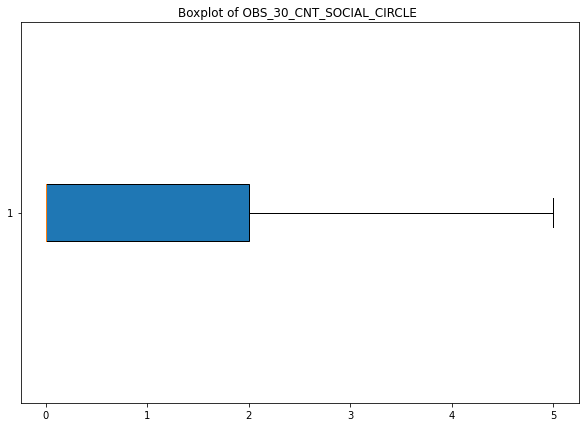

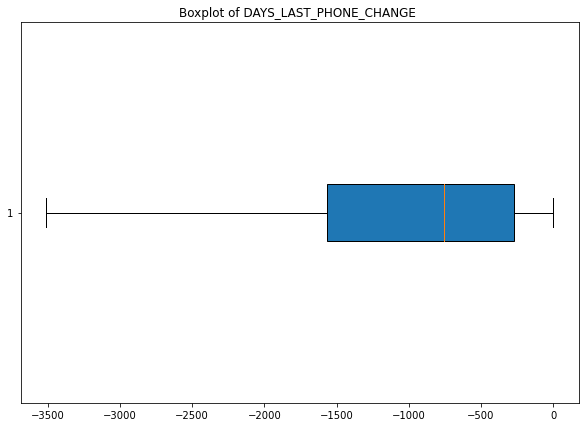

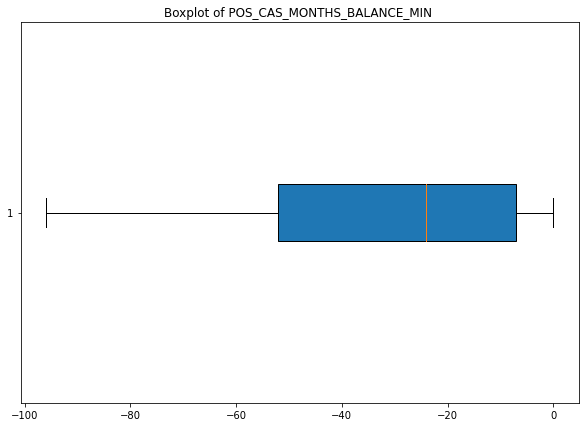

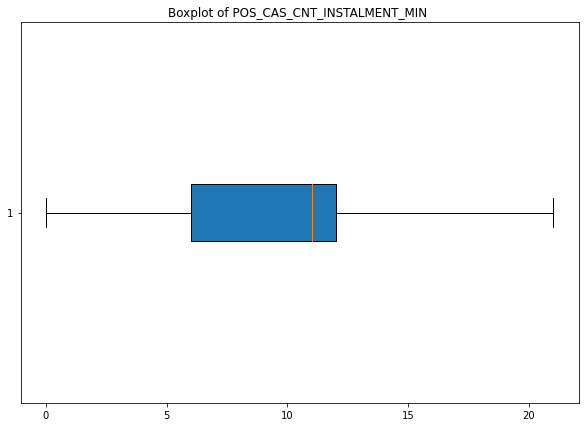

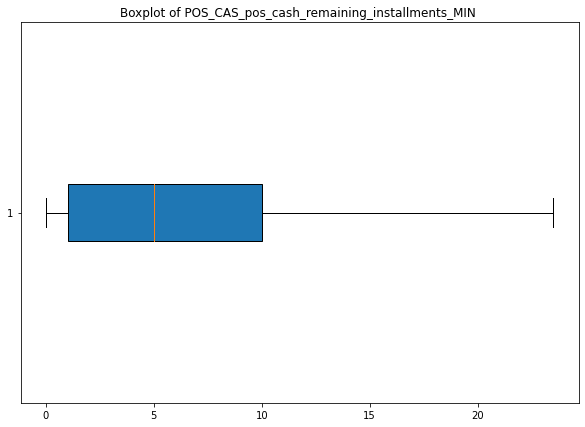

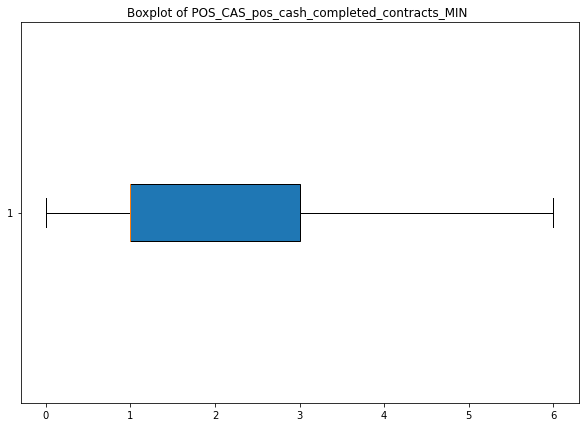

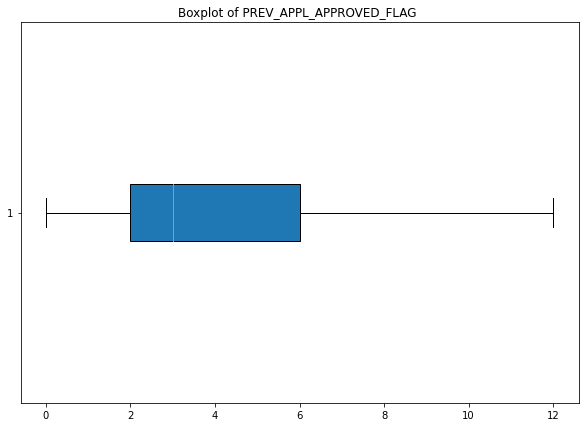

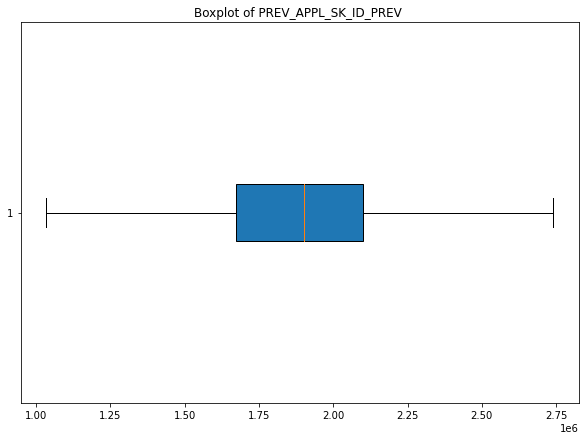

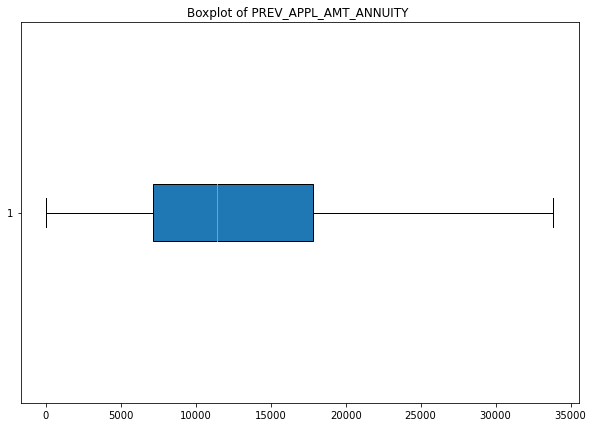

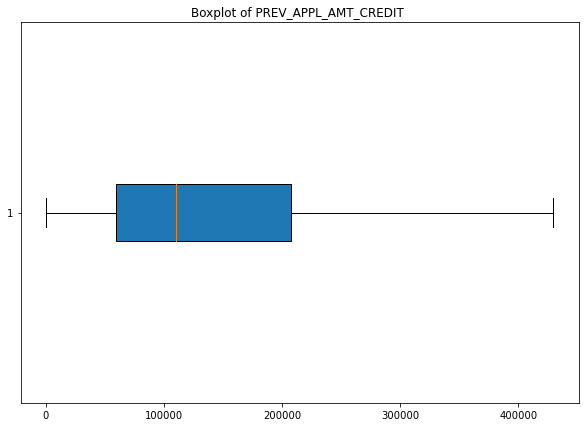

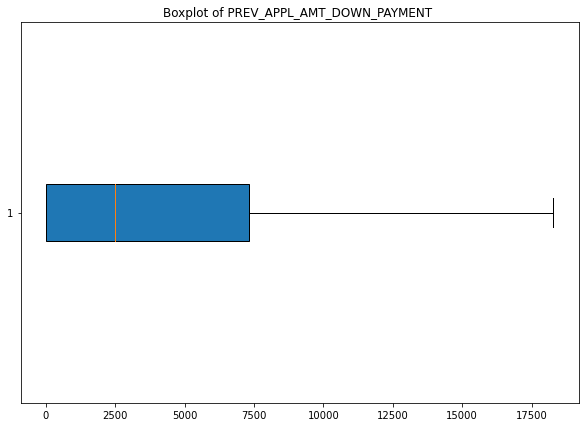

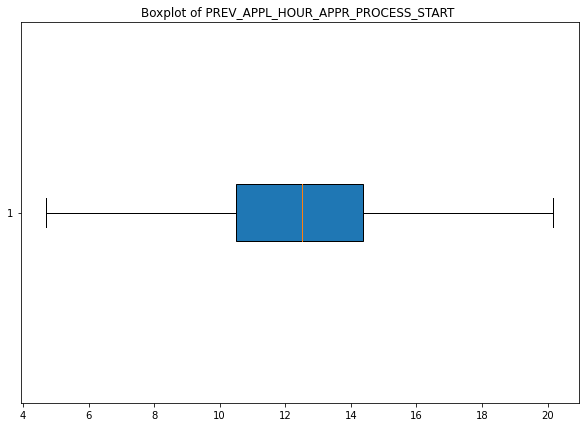

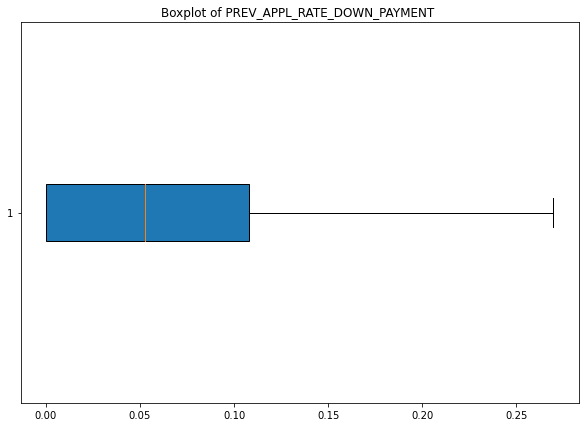

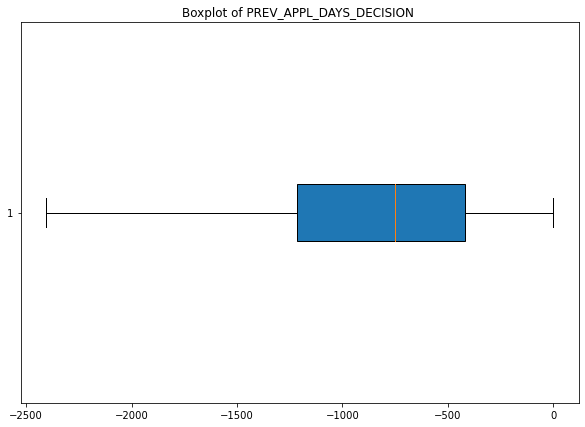

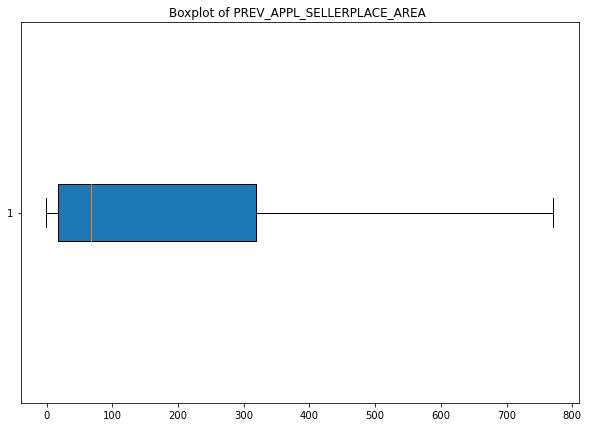

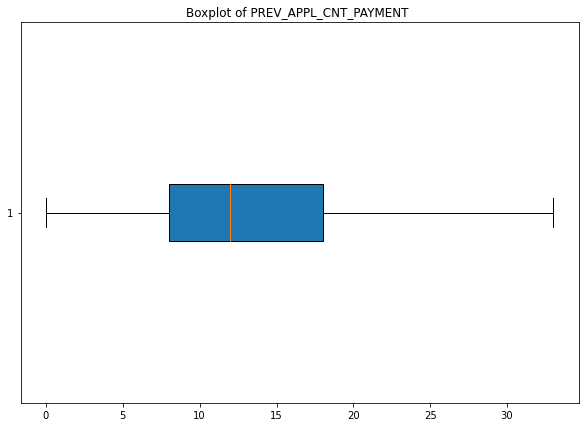

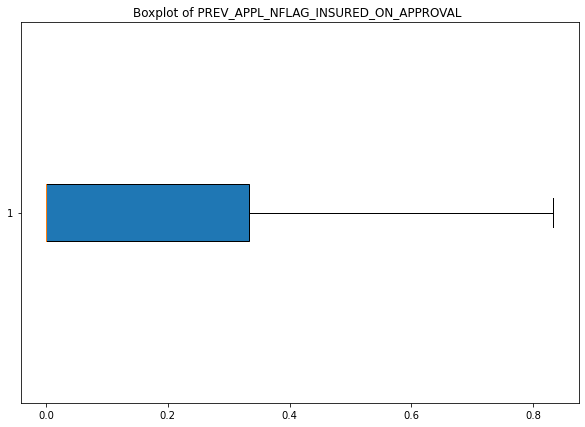

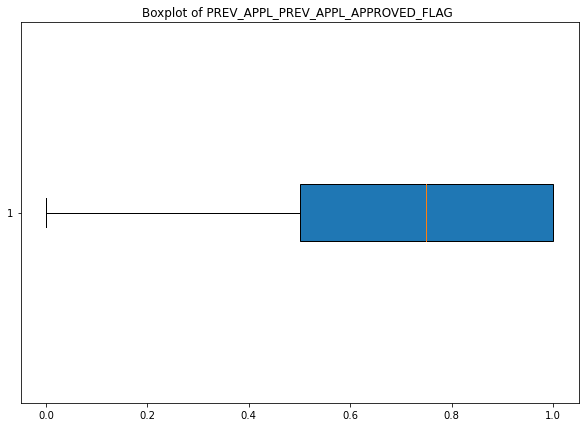

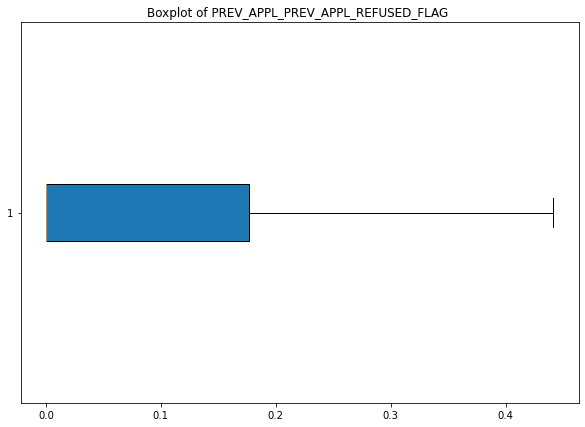

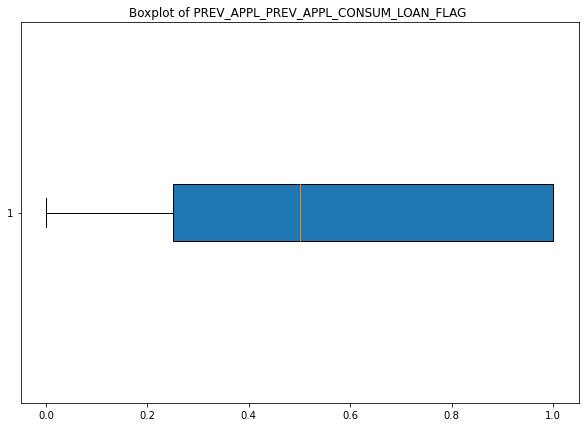

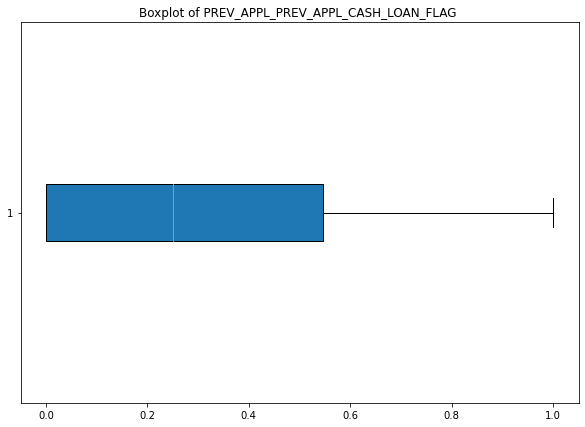

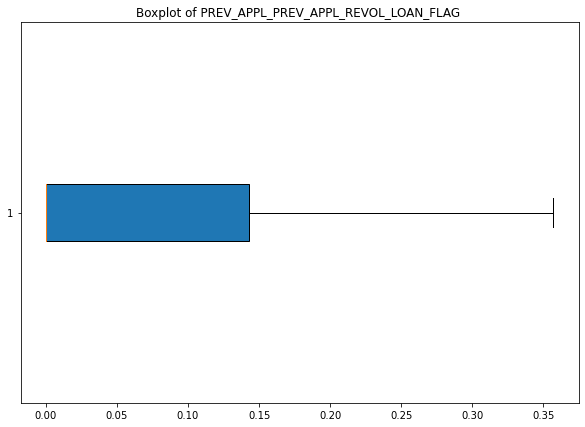

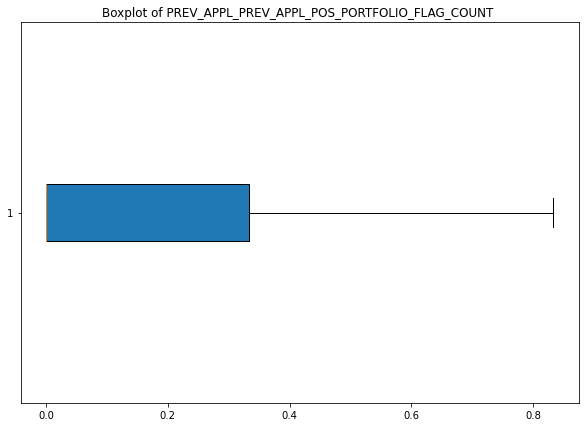

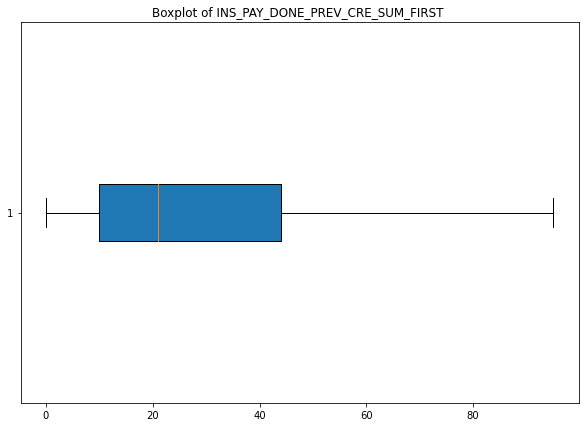

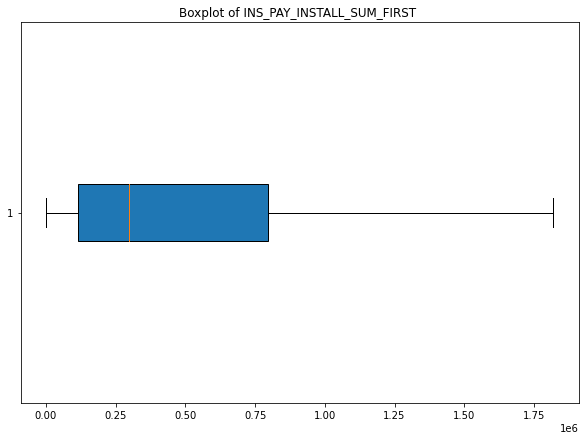

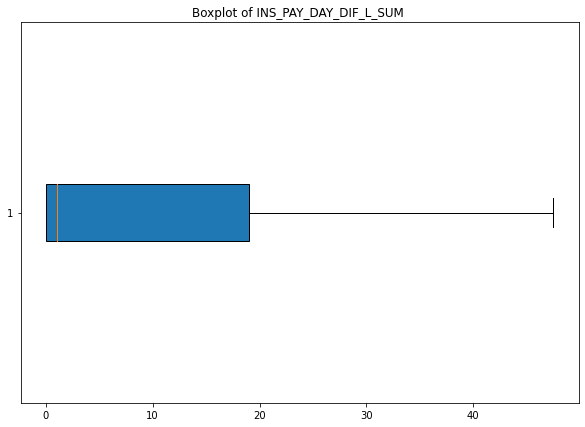

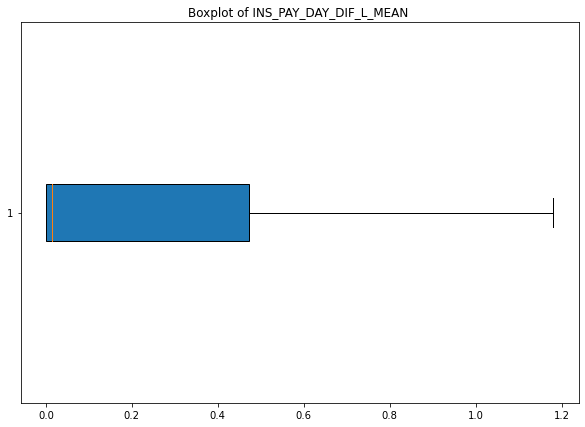

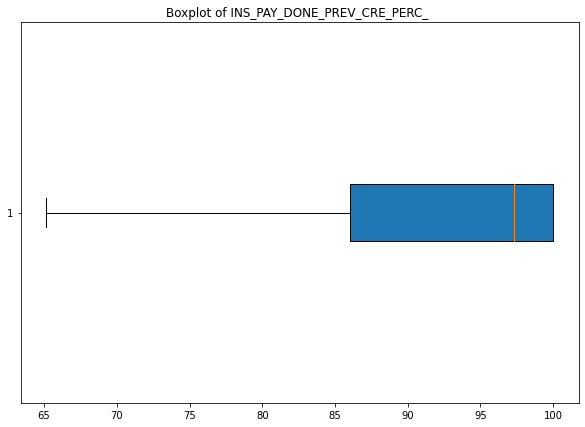

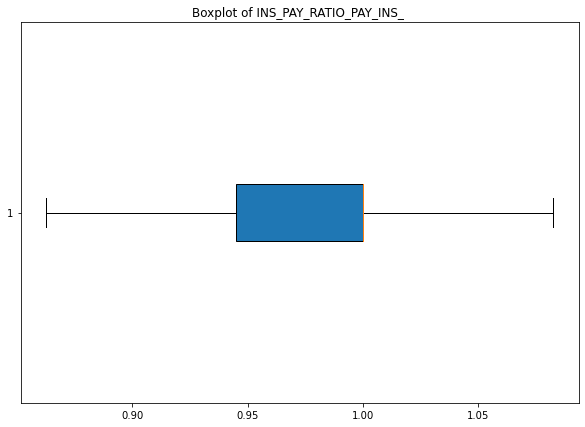

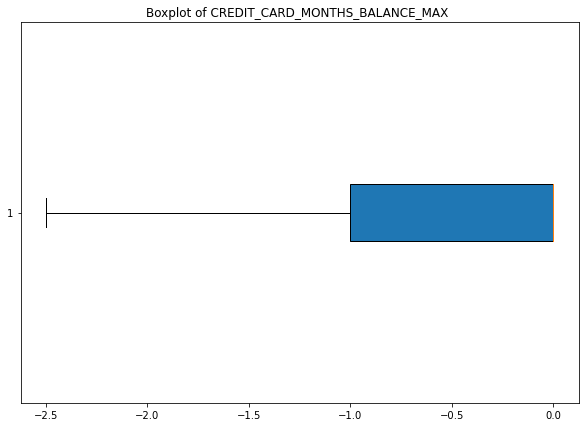

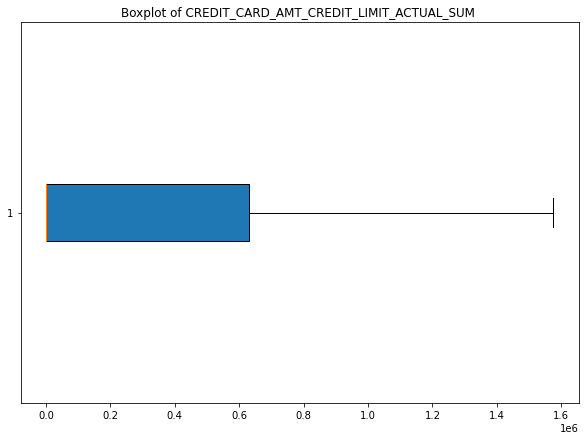

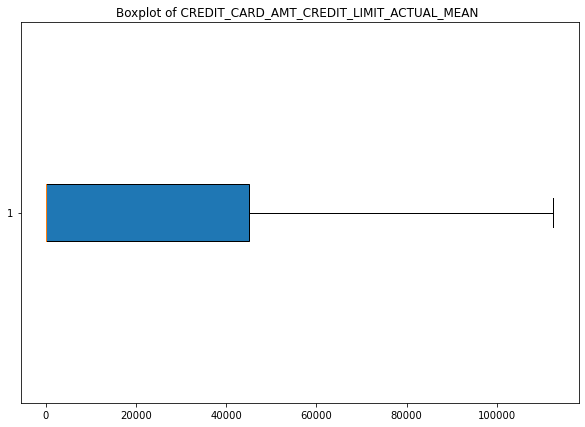

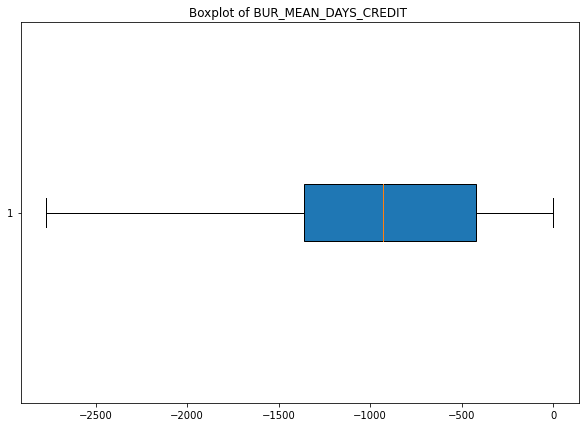

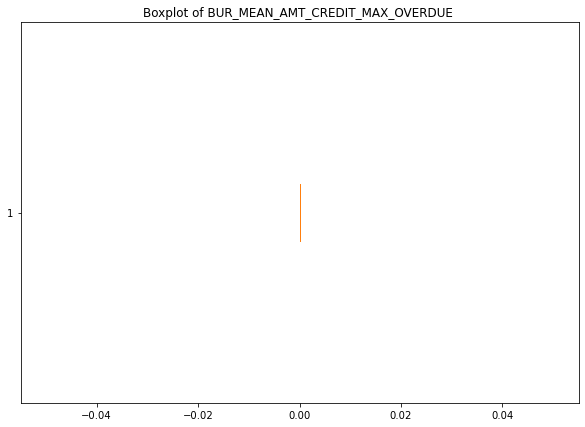

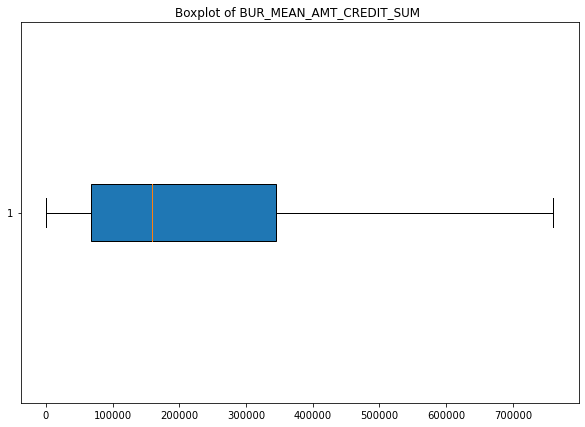

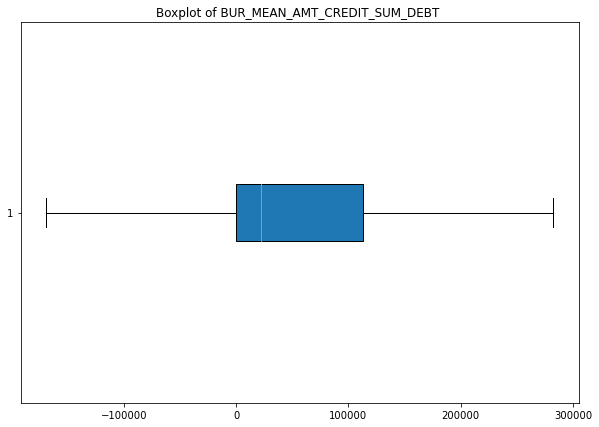

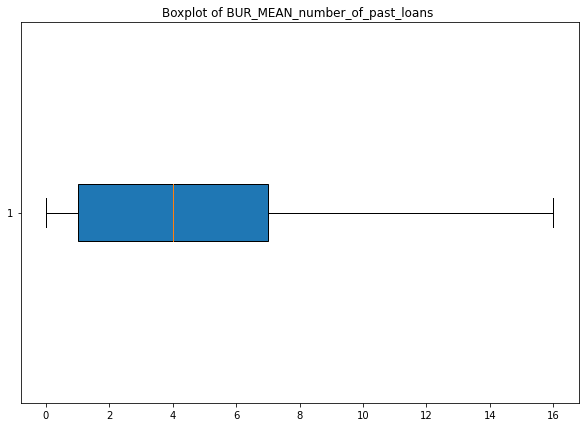

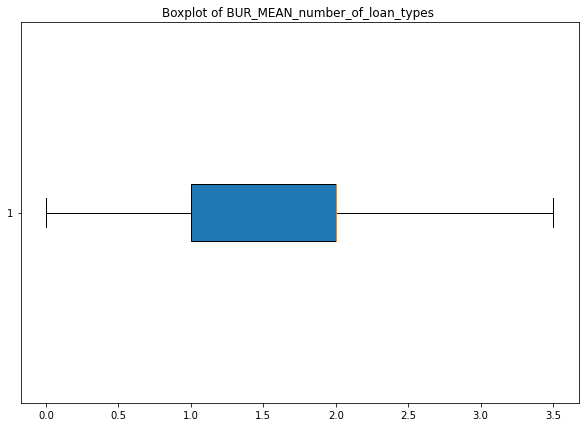

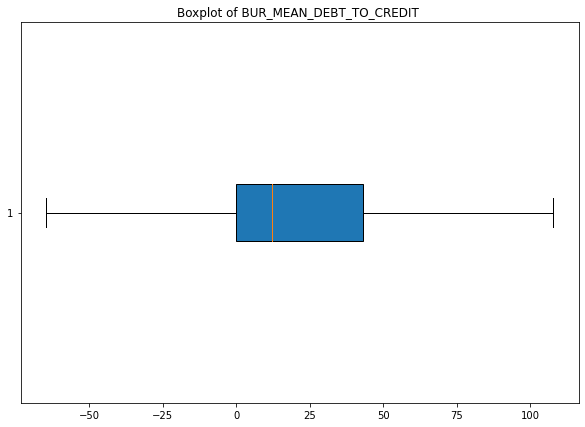

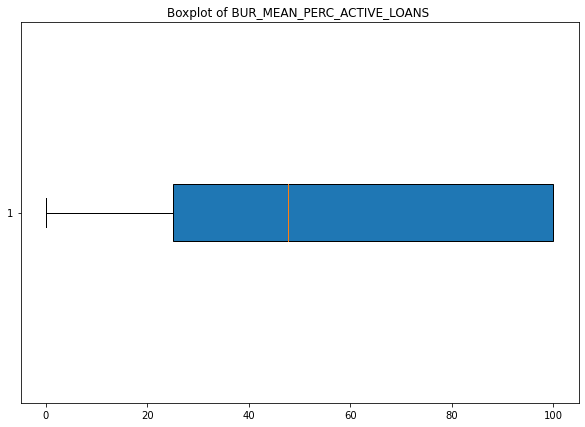

In [64]:
for feat in numeric_feats:
    fig, ax = plt.subplots(1, 1, figsize = (10, 7))
    plt.boxplot(reduced_train[feat].dropna(), patch_artist =True, vert = False)
    ax.set_title(f"Boxplot of {feat} ")

**Check behavior of each features**

In [65]:
columns = reduced_train.select_dtypes(exclude= "object").drop("TARGET", axis= 1).columns
columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_PHONE',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'POS_CAS_MONTHS_BALANCE_MIN', 'POS_CAS_CNT_INSTALMENT_MIN',
       'POS_CAS_pos_cash_remaining_installments_MIN',
       'POS_CAS_pos_cash_completed_contracts_MIN', 'PREV_APPL_APPROVED_FLAG',
       'PREV_APPL_SK_ID_PREV', 'PREV_APPL_AMT_ANNUITY', 'PREV_APPL_AMT_CREDIT',
       'PREV_APPL_AMT_DOWN_PAYMENT', 'PREV_APPL_HOUR_APPR_PROCESS_START',
       'PREV_APPL_RATE_DOWN_PAYMENT', 'PREV_APPL_DAYS_DECISION',
       'PREV_APPL_SELLERPLACE_AREA', 'PREV_APPL_CNT_PAYMENT',
       'PREV_APPL_NFLAG_INSURED_ON_APPROVAL',
       'PREV_APPL_PREV_APPL_APPROVED_FLAG', 'PREV_APPL_PREV_APPL_REFUSED_FLAG',
       'PR

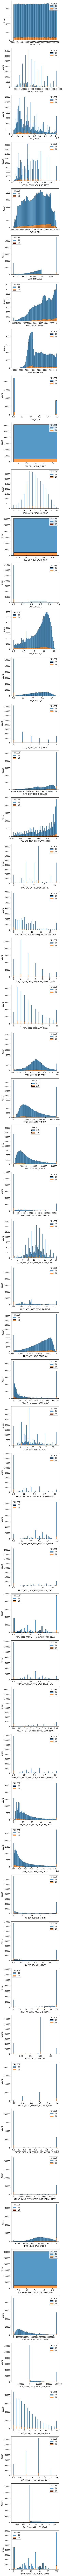

In [66]:
fig, axs = plt.subplots(len(columns), 1, figsize = (5, 5 *len(columns)))

for i in range(len(columns)):
    col_name = columns[i]
    sns.histplot(reduced_train, x = col_name, hue= "TARGET", multiple= "stack", ax= axs[i])

- We can choose some important features in view of their behavior

- Important feature: AMT_CREDIT, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, POS_CAS_MONTHS_BALANCE_MIN, POS_CAS_CNT_INSTALMENT_MIN, PREV_APPL_APPROVED_FLAG, PREV_APPL_AMT_CREDIT,....

In [67]:
reduced_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_SUM,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_MEAN,BUR_MEAN_DAYS_CREDIT,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_number_of_past_loans,BUR_MEAN_number_of_loan_types,BUR_MEAN_DEBT_TO_CREDIT,BUR_MEAN_PERC_ACTIVE_LOANS
0,100002,1.0,Cash loans,M,N,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,...,0.0,0.0,-874.0,0.0,108131.945312,49156.199219,8.0,2.0,28.412163,25.00000
1,100003,0.0,Cash loans,F,N,270000.0,1293502.5,Family,State servant,Higher education,...,0.0,0.0,-1401.0,0.0,254350.125000,0.000000,4.0,2.0,0.000000,25.00000
2,100004,0.0,Revolving loans,M,Y,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,...,0.0,0.0,-867.0,0.0,94518.898438,0.000000,2.0,1.0,0.000000,0.00000
3,100006,0.0,Cash loans,F,N,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,...,1575000.0,112500.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,100.00000
4,100007,0.0,Cash loans,M,N,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,...,0.0,0.0,-1149.0,0.0,146250.000000,0.000000,1.0,1.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,Cash loans,M,N,157500.0,254700.0,Unaccompanied,Working,Secondary / secondary special,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,100.00000
307507,456252,0.0,Cash loans,F,N,72000.0,269550.0,Unaccompanied,Pensioner,Secondary / secondary special,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,100.00000
307508,456253,0.0,Cash loans,F,N,153000.0,677664.0,Unaccompanied,Working,Higher education,...,0.0,0.0,-867.5,0.0,760564.875000,282403.125000,4.0,2.0,45.349318,50.00000
307509,456254,1.0,Cash loans,F,N,171000.0,370107.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,0.0,0.0,-1104.0,0.0,45000.000000,0.000000,1.0,1.0,0.000000,0.00000


## Encoding CATEGORICAL Feature

In [68]:
numeric_df = reduced_train._get_numeric_data()
numeric_df

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,...,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_SUM,CREDIT_CARD_AMT_CREDIT_LIMIT_ACTUAL_MEAN,BUR_MEAN_DAYS_CREDIT,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_number_of_past_loans,BUR_MEAN_number_of_loan_types,BUR_MEAN_DEBT_TO_CREDIT,BUR_MEAN_PERC_ACTIVE_LOANS
0,100002,1.0,202500.0,406597.5,0.018799,-9461.0,-637.0,-3648.0,-2120.0,1.0,...,0.0,0.0,-874.0,0.0,108131.945312,49156.199219,8.0,2.0,28.412163,25.00000
1,100003,0.0,270000.0,1293502.5,0.003542,-16765.0,-1188.0,-1186.0,-291.0,1.0,...,0.0,0.0,-1401.0,0.0,254350.125000,0.000000,4.0,2.0,0.000000,25.00000
2,100004,0.0,67500.0,135000.0,0.010033,-19046.0,-225.0,-4260.0,-2531.0,1.0,...,0.0,0.0,-867.0,0.0,94518.898438,0.000000,2.0,1.0,0.000000,0.00000
3,100006,0.0,135000.0,312682.5,0.008018,-19005.0,-3039.0,-9832.0,-2437.0,0.0,...,1575000.0,112500.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,100.00000
4,100007,0.0,121500.0,513000.0,0.028656,-19932.0,-3038.0,-4312.0,-3458.0,0.0,...,0.0,0.0,-1149.0,0.0,146250.000000,0.000000,1.0,1.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,157500.0,254700.0,0.032562,-9327.0,-236.0,-8456.0,-1982.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,100.00000
307507,456252,0.0,72000.0,269550.0,0.025162,-20775.0,3417.5,-4388.0,-4090.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,100.00000
307508,456253,0.0,153000.0,677664.0,0.005001,-14966.0,-6466.5,-6736.0,-5150.0,0.0,...,0.0,0.0,-867.5,0.0,760564.875000,282403.125000,4.0,2.0,45.349318,50.00000
307509,456254,1.0,171000.0,370107.0,0.005314,-11961.0,-4786.0,-2562.0,-931.0,0.0,...,0.0,0.0,-1104.0,0.0,45000.000000,0.000000,1.0,1.0,0.000000,0.00000


In [69]:
categ_features = [i for i in reduced_train.columns if i not in numeric_df.columns]
categ_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [70]:
reduced_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [71]:
reduced_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [72]:
reduced_train['FLAG_OWN_CAR'].value_counts()


N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [73]:
reduced_train['NAME_TYPE_SUITE'].value_counts()
# có 0, encoding lỗi, fixed below

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
0                    1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [74]:
reduced_train['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [75]:
reduced_train['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [76]:
reduced_train['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [77]:
reduced_train['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [78]:
reduced_train['OCCUPATION_TYPE'].value_counts()
# có 0, encoding lỗi, fixed below

0                        96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [79]:
reduced_train['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [80]:
reduced_train['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [81]:
reduced_train[categ_features]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,N,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0,MONDAY,XNA
307508,Cash loans,F,N,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


In [82]:
df1 = reduced_train[categ_features].replace(0,'Unknown')
df1 

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,N,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,Unknown,MONDAY,XNA
307508,Cash loans,F,N,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


In [83]:

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# ordinal_encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder

x_train = df1[['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START','OCCUPATION_TYPE', 
'NAME_TYPE_SUITE','ORGANIZATION_TYPE']]


x_train = OneHotEncoder().fit_transform(x_train)

In [84]:
x_train= x_train.toarray()
x_train = pd.DataFrame(x_train)
x_train.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,107,108,109,110,111,112,113,114,115,116
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,307507,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,307508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,307509,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
from sklearn.feature_selection import SelectKBest, chi2

In [86]:
y_train = reduced_train['TARGET']

In [87]:
xy_train_df = SelectKBest(score_func = chi2, k = 11).fit_transform(x_train, y_train)
xy_train_df = pd.DataFrame(xy_train_df)
xy_train_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
307508,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [88]:
reduced_train.drop(labels = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START','OCCUPATION_TYPE', 
'NAME_TYPE_SUITE','ORGANIZATION_TYPE'], inplace = True, axis = 1)

In [90]:
xy_train_df.rename({0:'SK_ID_CURR'}).reset_index()

,index,0,1,2,3,4,5,6,7,8,9,10
0,SK_ID_CURR,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,307507,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
307508,307508,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,307509,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [91]:
xy_train_df.reset_index()

,index,0,1,2,3,4,5,6,7,8,9,10
0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,307507,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
307508,307508,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,307509,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [92]:
xy_train_df[0] = reduced_train['SK_ID_CURR']

In [93]:
xy_train_df

,0,1,2,3,4,5,6,7,8,9,10
0,100002,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,100003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,100006,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,100007,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
307508,456253,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [94]:
final_df = pd.concat([reduced_train, xy_train_df], axis = 1)
final_df


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,1,2,3,4,5,6,7,8,9,10
0,100002,1.0,Cash loans,M,N,202500.0,406597.5,0.018799,-9461.0,-637.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,100003,0.0,Cash loans,F,N,270000.0,1293502.5,0.003542,-16765.0,-1188.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,67500.0,135000.0,0.010033,-19046.0,-225.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,135000.0,312682.5,0.008018,-19005.0,-3039.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,100007,0.0,Cash loans,M,N,121500.0,513000.0,0.028656,-19932.0,-3038.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,Cash loans,M,N,157500.0,254700.0,0.032562,-9327.0,-236.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0.0,Cash loans,F,N,72000.0,269550.0,0.025162,-20775.0,3417.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
307508,456253,0.0,Cash loans,F,N,153000.0,677664.0,0.005001,-14966.0,-6466.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1.0,Cash loans,F,N,171000.0,370107.0,0.005314,-11961.0,-4786.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [95]:
final_df.to_csv('FINAL_df.csv', index = False)